# Customer Churn Analysis

## Problem Statement:

#### Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.


#### Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

#### Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

#### You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

#### Goal: -

We have to predict the if a customer is likely to continue with the services or stop using the services based on some features of the customer like his tenure, total charges he is paying, payment method, contract etc.

In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# SETTING A customized plot style,font, figure and color
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE554'

In [3]:
# loading the data
churn = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
# importing data from github directly

In [4]:
# looking at the shape
churn.shape

# There are more than 7000 rows and 21 columns

(7043, 21)

In [5]:
# Inorder to view all the columns while printing we are setting an option to display the maximum columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
# looking at the first 20 rows
churn.head(20)

# We can observe that categorical variables are more compared to the continuous ones

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female              0     Yes         No       1           No   
1   5575-GNVDE    Male              0      No         No      34          Yes   
2   3668-QPYBK    Male              0      No         No       2          Yes   
3   7795-CFOCW    Male              0      No         No      45           No   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
6   1452-KIOVK    Male              0      No        Yes      22          Yes   
7   6713-OKOMC  Female              0      No         No      10           No   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
9   6388-TABGU    Male              0      No        Yes      62          Yes   
10  9763-GRSKD    Male              0     Yes        Yes      13          Yes   
11  7469-LKBCI    Male              0      No         No      16          Yes   
12  8091-TTVAX    Male              0     Yes         No      58          Yes   
13  0280-XJGEX    Male              0      No         No      49          Yes   
14  5129-JLPIS    Male              0      No         No      25          Yes   
15  3655-SNQYZ  Female              0     Yes        Yes      69          Yes   
16  8191-XWSZG  Female              0      No         No      52          Yes   
17  9959-WOFKT    Male              0      No        Yes      71          Yes   
18  4190-MFLUW  Female              0     Yes        Yes      10          Yes   
19  4183-MYFRB  Female              0      No         No      21          Yes   

       MultipleLines InternetService       OnlineSecurity  \
0   No phone service             DSL                   No   
1                 No             DSL                  Yes   
2                 No             DSL                  Yes   
3   No phone service             DSL                  Yes   
4                 No     Fiber optic                   No   
5                Yes     Fiber optic                   No   
6                Yes     Fiber optic                   No   
7   No phone service             DSL                  Yes   
8                Yes     Fiber optic                   No   
9                 No             DSL                  Yes   
10                No             DSL                  Yes   
11                No              No  No internet service   
12               Yes     Fiber optic                   No   
13               Yes     Fiber optic                   No   
14                No     Fiber optic                  Yes   
15               Yes     Fiber optic                  Yes   
16                No              No  No internet service   
17               Yes     Fiber optic                  Yes   
18                No             DSL                   No   
19                No     Fiber optic                   No   

           OnlineBackup     DeviceProtection          TechSupport  \
0                   Yes                   No                   No   
1                    No                  Yes                   No   
2                   Yes                   No                   No   
3                    No                  Yes                  Yes   
4                    No                   No                   No   
5                    No                  Yes                   No   
6                   Yes                   No                   No   
7                    No                   No                   No   
8                    No                  Yes                  Yes   
9                   Yes                   No                   No   
10                   No                   No                   No   
11  No internet service  No internet service  No internet service   
12                   No                  Yes                   No   
13                  Yes                  Yes          

In [7]:
# looking at the last 20 rows
churn.tail(20)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7023  1035-IPQPU  Female              1     Yes         No      63   
7024  7398-LXGYX    Male              0     Yes         No      44   
7025  2823-LKABH  Female              0      No         No      18   
7026  8775-CEBBJ  Female              0      No         No       9   
7027  0550-DCXLH    Male              0      No         No      13   
7028  9281-CEDRU  Female              0     Yes         No      68   
7029  2235-DWLJU  Female              1      No         No       6   
7030  0871-OPBXW  Female              0      No         No       2   
7031  3605-JISKB    Male              1     Yes         No      55   
7032  6894-LFHLY    Male              1      No         No       1   
7033  9767-FFLEM    Male              0      No         No      38   
7034  0639-TSIQW  Female              0      No         No      67   
7035  8456-QDAVC    Male              0      No         No      19   
7036  7750-EYXWZ  Female              0      No         No      12   
7037  2569-WGERO  Female              0      No         No      72   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
7023          Yes               Yes     Fiber optic                   No   
7024          Yes               Yes     Fiber optic                  Yes   
7025          Yes               Yes     Fiber optic                   No   
7026          Yes                No             DSL                   No   
7027          Yes                No             DSL                   No   
7028          Yes                No             DSL                   No   
7029           No  No phone service             DSL                   No   
7030          Yes                No              No  No internet service   
7031          Yes               Yes             DSL                  Yes   
7032          Yes               Yes     Fiber optic                   No   
7033          Yes                No     Fiber optic                   No   
7034          Yes               Yes     Fiber optic                  Yes   
7035          Yes                No     Fiber optic                   No   
7036           No  No phone service             DSL                   No   
7037          Yes                No              No  No internet service   
7038          Yes               Yes             DSL                  Yes   
7039          Yes               Yes     Fiber optic                   No   
7040           No  No phone service             DSL                  Yes   
7041          Yes               Yes     Fiber optic                   No   
7042          Yes                No     Fiber optic                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
7023                  Yes                  Yes                   No   
7024                   No                  Yes                   No   
7025                   No                  Yes                  Yes   
7026                   No                   No                   No   
7027                  Yes                   No                  Yes   
7028                  Yes                   No                  Yes   
7029                   No                   No                   No   
7030  No internet service  No internet service  No internet service   
7031                  Yes                   No                   No   
7032                   No                   No                   No   
7033                   No                   No                   No   
7034                  Yes                  Yes                   No   
7035           

In [8]:
# looking at random rows now
churn.sample(20)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
670   5642-MHDQT  Female              0     Yes        Yes      53   
310   1098-TDVUQ  Female              0      No         No       1   
6880  6976-BWGLQ  Female              0     Yes        Yes      72   
4503  9658-WYUFB  Female              0      No         No      17   
4203  4291-YZODP  Female              0      No        Yes       7   
4653  2091-MJTFX  Female              0     Yes        Yes      30   
5012  9367-TCUYN  Female              0      No         No      12   
3603  1501-SGHBW    Male              0      No         No       2   
94    9848-JQJTX    Male              0      No         No      72   
4332  4194-FJARJ  Female              0     Yes        Yes      54   
7009  7703-ZEKEF    Male              0      No         No      23   
1159  4086-YQSNZ  Female              1     Yes         No       3   
2624  0820-FNRNX    Male              0     Yes        Yes      17   
6400  7921-BEPCI  Female              0      No         No      72   
5846  3370-HXOPH  Female              0      No         No       3   
95    8637-XJIVR  Female              0      No         No      12   
5072  5995-SNNEW    Male              1     Yes         No      23   
1120  1047-NNCBF    Male              0      No         No      20   
162   4482-EWFMI  Female              0      No         No       2   
6728  2380-DAMQP  Female              0     Yes         No      72   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
670           Yes                No              No  No internet service   
310           Yes                No              No  No internet service   
6880          Yes               Yes              No  No internet service   
4503          Yes               Yes     Fiber optic                  Yes   
4203          Yes                No              No  No internet service   
4653           No  No phone service             DSL                   No   
5012          Yes                No              No  No internet service   
3603          Yes                No             DSL                   No   
94            Yes               Yes     Fiber optic                   No   
4332          Yes               Yes             DSL                  Yes   
7009          Yes               Yes     Fiber optic                   No   
1159          Yes                No     Fiber optic                   No   
2624          Yes               Yes             DSL                   No   
6400          Yes               Yes             DSL                  Yes   
5846          Yes               Yes     Fiber optic                   No   
95            Yes               Yes     Fiber optic                  Yes   
5072          Yes               Yes     Fiber optic                   No   
1120          Yes                No     Fiber optic                   No   
162           Yes                No     Fiber optic                   No   
6728          Yes               Yes     Fiber optic                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
670   No internet service  No internet service  No internet service   
310   No internet service  No internet service  No internet service   
6880  No internet service  No internet service  No internet service   
4503                  Yes                   No                   No   
4203  No internet service  No internet service  No internet service   
4653                   No                   No                  Yes   
5012  No internet service  No internet service  No internet service   
3603                   No                   No                   No   
94                    Yes                  Yes                   No   
4332                   No                   No                  Yes   
7009                   No                  Yes                   No   
1159                   No                   No                   No   
2624           

## CHECKING THE NULL VALUES

In [9]:
churn.isnull().sum()

# We can see that there are no null values in this data
# which is good

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

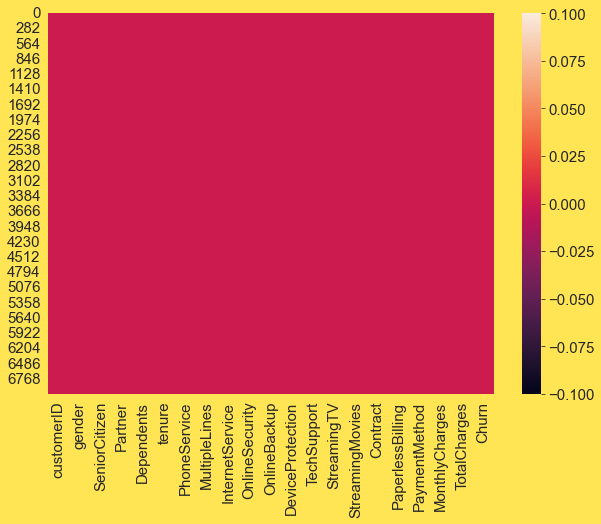

In [10]:
## plotting a heatmap to view the same
sns.heatmap(churn.isnull())

In [11]:
# checking duplicates
duplicates = churn[churn.duplicated()]
duplicates

# We can see there are no duplicates

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

# EDA

In [12]:
# looking at the info of the data
churn.info()

# We can see out of 21 columns  only three columns are continuous
# We have to treat the datatype of Total charges column as it is represented as a categorical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
# looking at the descriptive summary of the data
churn.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [14]:
# looking at the summary of categorical data
churn.describe(include='O').T

# We can observe that there are some blank values in the total charges column


count unique               top  freq
customerID        7043   7043        7590-VHVEG     1
gender            7043      2              Male  3555
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
TotalCharges      7043   6531                      11
Churn             7043      2                No  5174

In [15]:
# checking the blank values inn total charges
churn.loc[churn['TotalCharges'] == ' ']

# we can see that there are 

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  \
488            No  No phone service             DSL                  Yes   
753           Yes                No              No  No internet service   
936           Yes                No             DSL                  Yes   
1082          Yes               Yes              No  No internet service   
1340           No  No phone service             DSL                  Yes   
3331          Yes                No              No  No internet service   
3826          Yes               Yes              No  No internet service   
4380          Yes                No              No  No internet service   
5218          Yes                No              No  No internet service   
6670          Yes               Yes             DSL                   No   
6754          Yes               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85             

In [16]:
# looking in other columns as well
churn.loc[churn['MonthlyCharges'] == ' ']

# There are no blank values in Monthly charges

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

In [17]:
# checking if any other column has blank values(' '),special characters(?,-,_) etc to make sure the data is clean
chars =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A"]
cols = ['customerID','gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']
for i in cols:
    for j in chars:
        print(f"{j} in {i} = ",end= " ")
        print((churn[i] == j).sum())
        
# We can see that there is only blank values in total charges

  in customerID =  0
? in customerID =  0
- in customerID =  0
 ? in customerID =  0
 - in customerID =  0
?  in customerID =  0
-  in customerID =  0
 ?  in customerID =  0
 -  in customerID =  0
NA in customerID =  0
N/A in customerID =  0
 NA in customerID =  0
 N/A in customerID =  0
  in gender =  0
? in gender =  0
- in gender =  0
 ? in gender =  0
 - in gender =  0
?  in gender =  0
-  in gender =  0
 ?  in gender =  0
 -  in gender =  0
NA in gender =  0
N/A in gender =  0
 NA in gender =  0
 N/A in gender =  0
  in SeniorCitizen =  0
? in SeniorCitizen =  0
- in SeniorCitizen =  0
 ? in SeniorCitizen =  0
 - in SeniorCitizen =  0
?  in SeniorCitizen =  0
-  in SeniorCitizen =  0
 ?  in SeniorCitizen =  0
 -  in SeniorCitizen =  0
NA in SeniorCitizen =  0
N/A in SeniorCitizen =  0
 NA in SeniorCitizen =  0
 N/A in SeniorCitizen =  0
  in Partner =  0
? in Partner =  0
- in Partner =  0
 ? in Partner =  0
 - in Partner =  0
?  in Partner =  0
-  in Partner =  0
 ?  in Partner =

In [18]:
# looking at the unique values in each column
for i in churn.columns:
    print(i,':',churn[i].unique())
    print('\n')

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


gender : ['Female' 'Male']


SeniorCitizen : [0 1]


Partner : ['Yes' 'No']


Dependents : ['No' 'Yes']


tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


PhoneService : ['No' 'Yes']


MultipleLines : ['No phone service' 'No' 'Yes']


InternetService : ['DSL' 'Fiber optic' 'No']


OnlineSecurity : ['No' 'Yes' 'No internet service']


OnlineBackup : ['Yes' 'No' 'No internet service']


DeviceProtection : ['No' 'Yes' 'No internet service']


TechSupport : ['No' 'Yes' 'No internet service']


StreamingTV : ['No' 'Yes' 'No internet service']


StreamingMovies : ['No' 'Yes' 'No internet service']


Contract : ['Month-to-month' 'One year' 'Two year']


PaperlessBilling : ['Yes' 'No']


PaymentMethod : ['Electro

In [19]:
# replacing the blanks with nan values to see the nan values
churn['TotalCharges'] = churn['TotalCharges'].replace(' ',np.nan)

In [20]:
# now checking the null values again
churn.isnull().sum()

# We can see there are 11 null values in the TotalCharges

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
churn.shape

(7043, 21)

In [22]:
# treating the null values
churn['TotalCharges'].isnull().sum()/7043*100
# less than  1% null values are present

0.1561834445548772

In [23]:
# As there are very less null values data
# And they are missing completely at the random
# We will drop the null values 
# checking the shape before dropping
churn.shape

(7043, 21)

In [24]:
# After dropping
churn.dropna(inplace=True)

In [25]:
churn.shape
# 11 rows have been dropped

(7032, 21)

In [26]:
# checking null values again
churn.isnull().sum()
# Now we are good

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [27]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [28]:
# Now we have to change the datatype of TotalCharges as it appeared it was shown as categorical type but actually it is a float
churn['TotalCharges']= churn['TotalCharges'].astype(float)

In [29]:
churn['TotalCharges'].dtype

# We can see that the dtype is now changed

dtype('float64')

In [30]:
# checking the value counts of customer id
#churn['customerID'].value_counts()
# As customer id has all unique values and acts as an index to the dataframe we will delete it
churn.drop(['customerID'],axis=1,inplace=True)

In [31]:
churn.head()
# We can see now that the customerID is removed

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

## Univarite Analysis

In [32]:
# seperating categorical and continuous columns
cat_cols = churn.dtypes[churn.dtypes == 'object'].index.tolist()
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [33]:
# continuous vars
cont_cols = churn.dtypes[churn.dtypes != 'object'].index.tolist()
cont_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Male      3549
Female    3483
Name: gender, dtype: int64


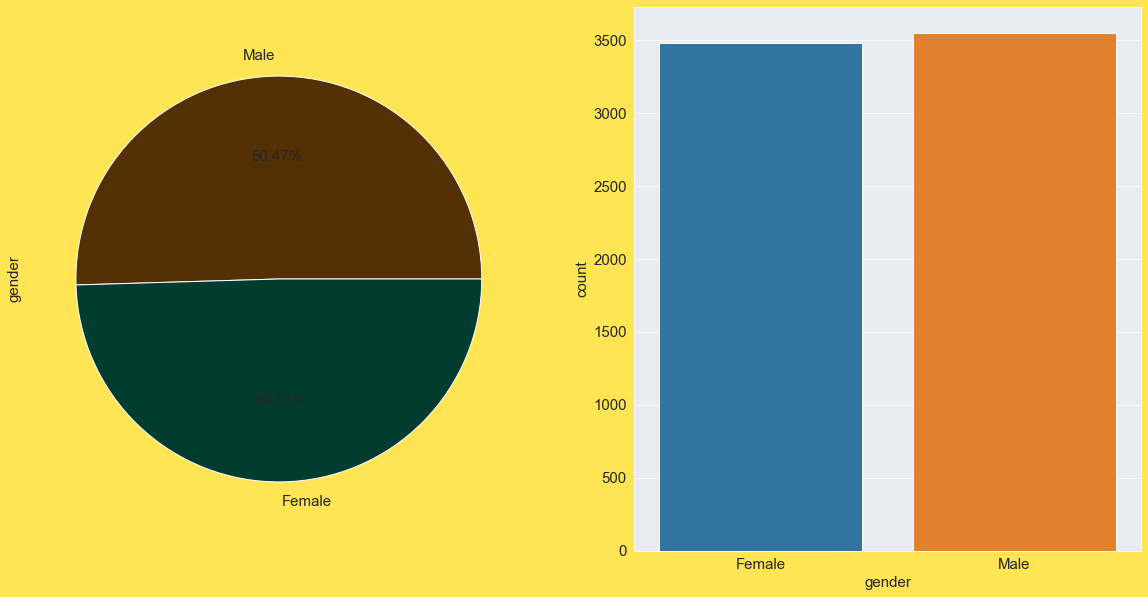

No     3639
Yes    3393
Name: Partner, dtype: int64


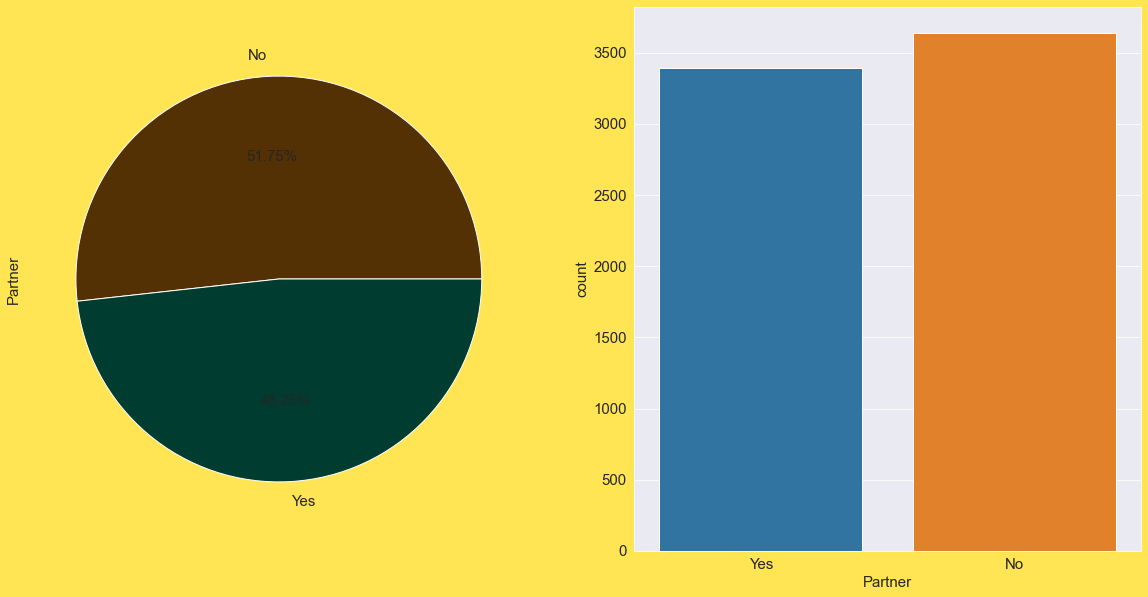

No     4933
Yes    2099
Name: Dependents, dtype: int64


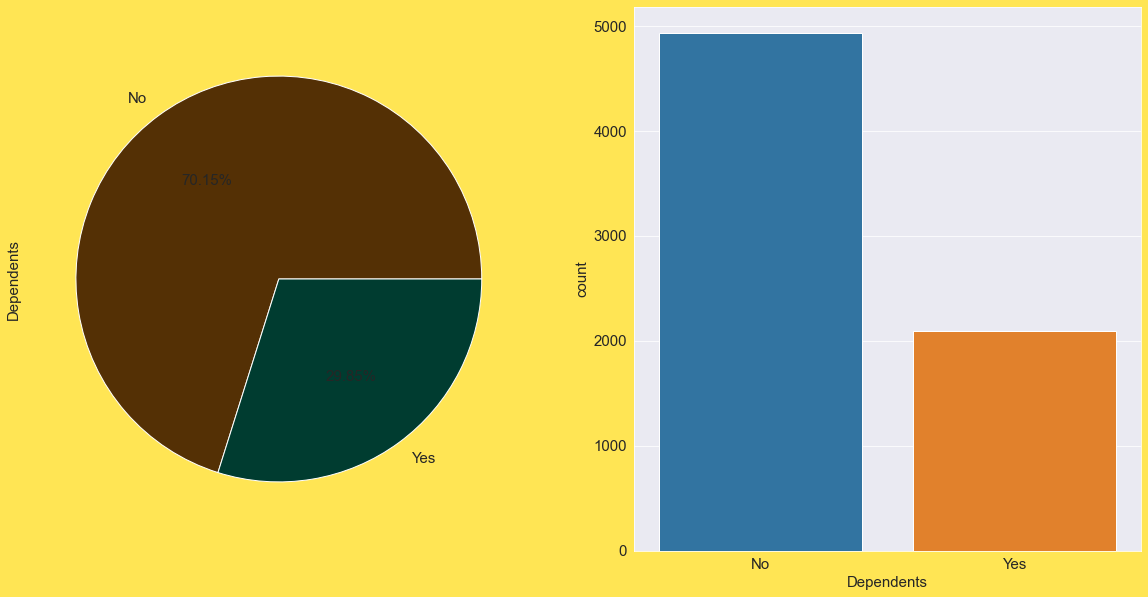

Yes    6352
No      680
Name: PhoneService, dtype: int64


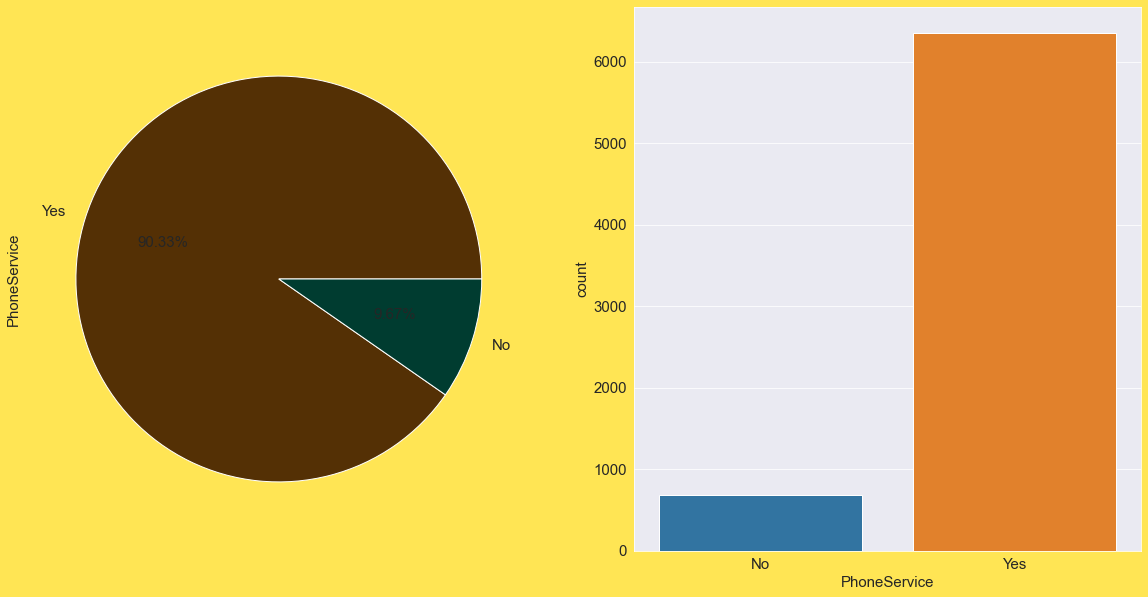

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64


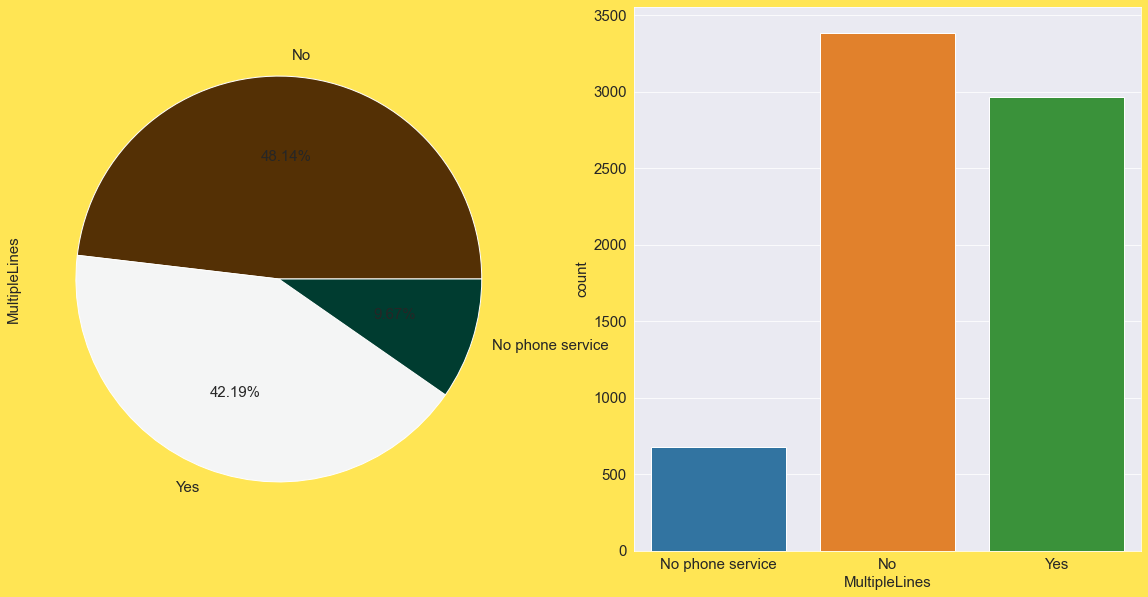

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64


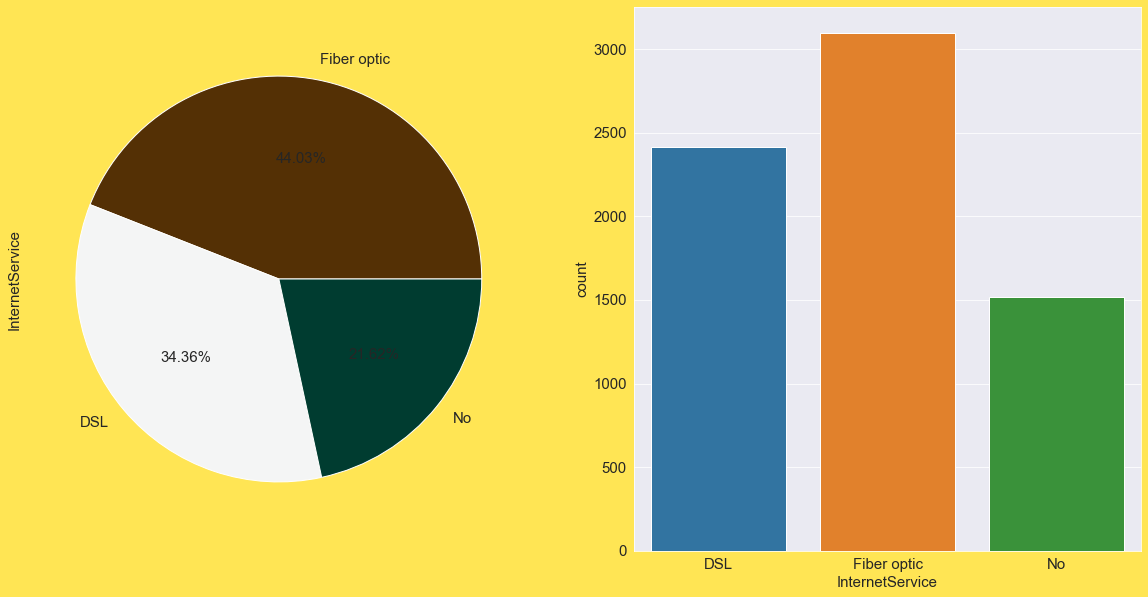

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64


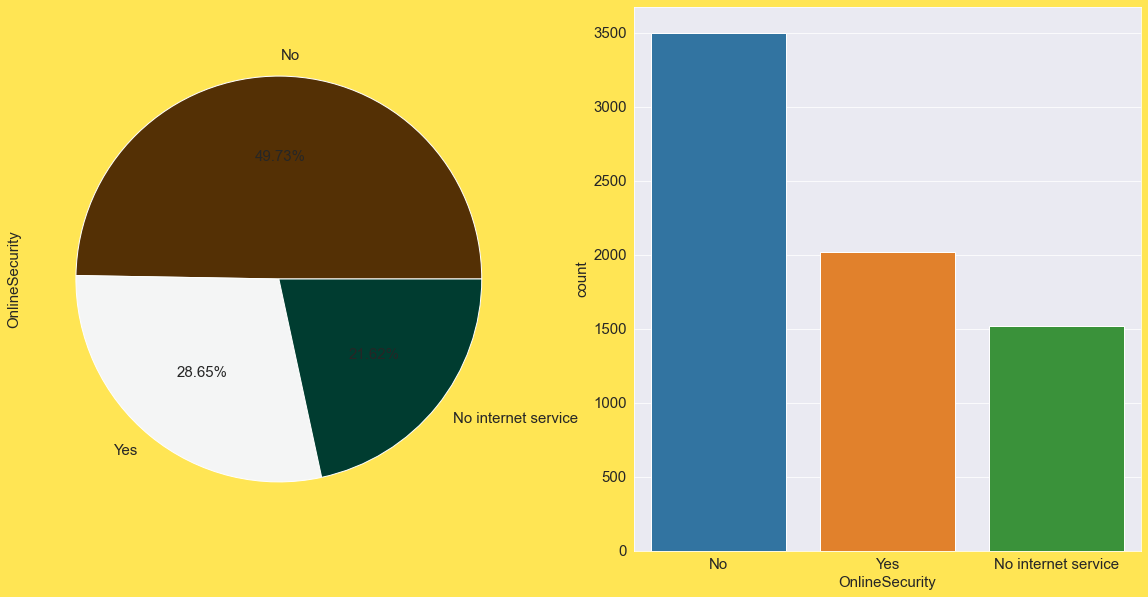

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64


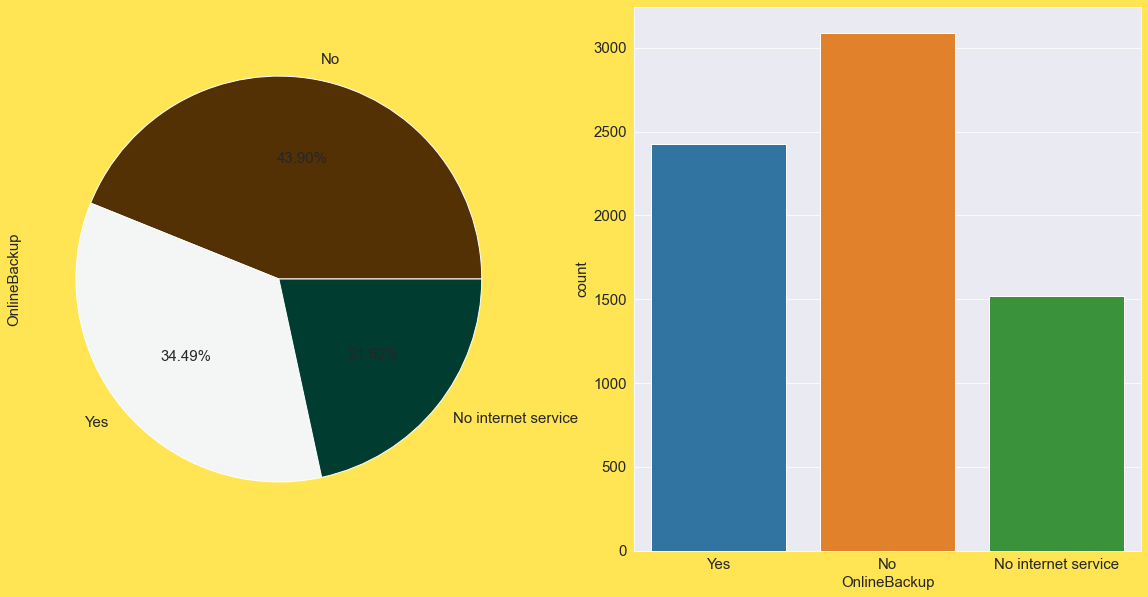

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64


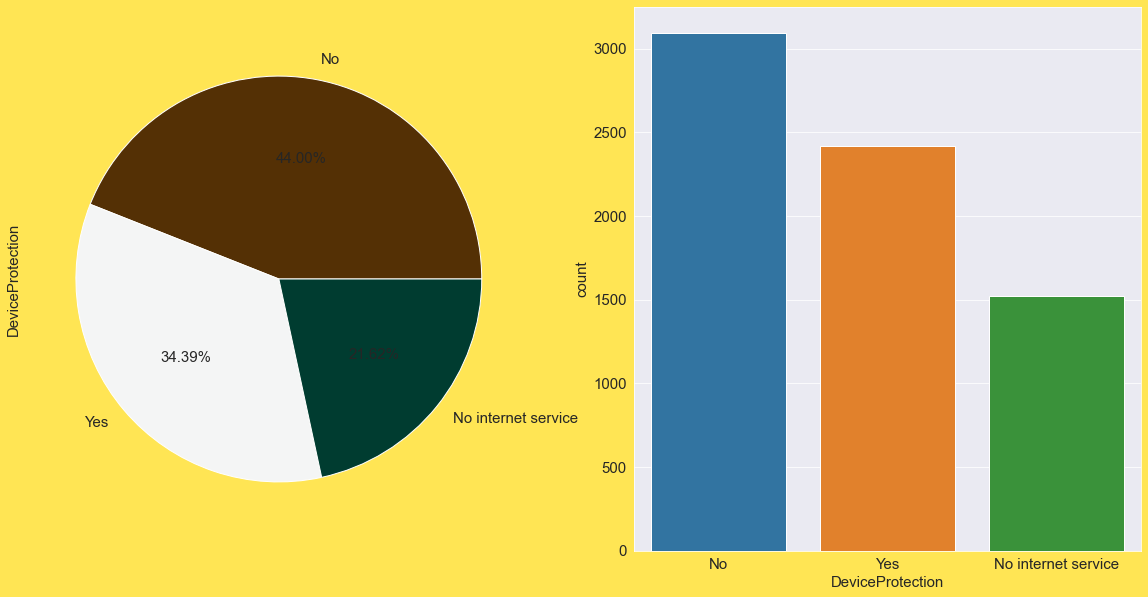

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64


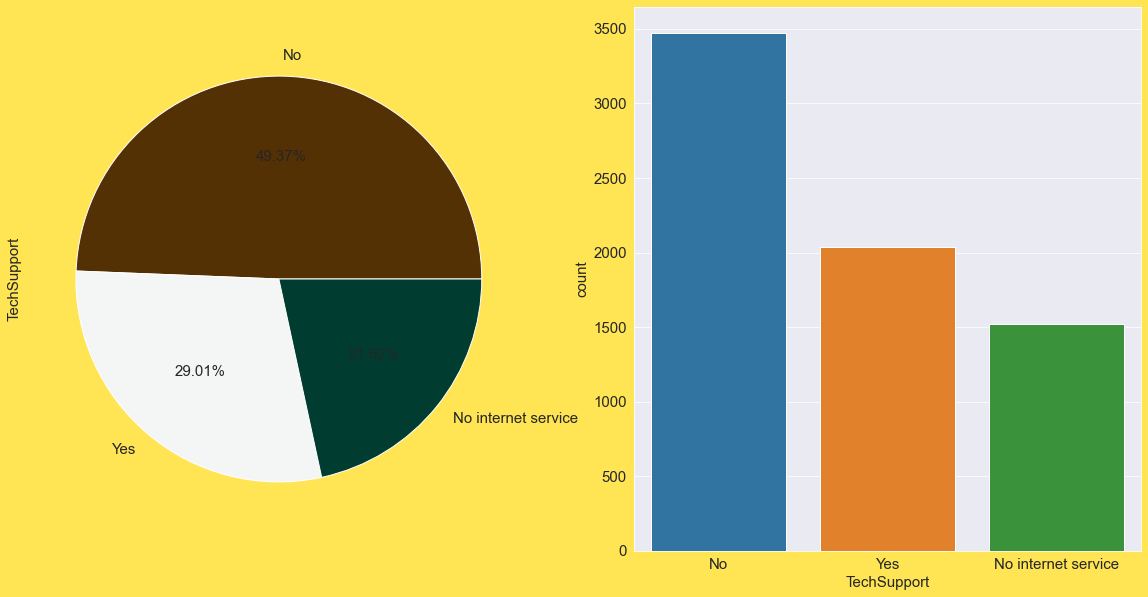

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64


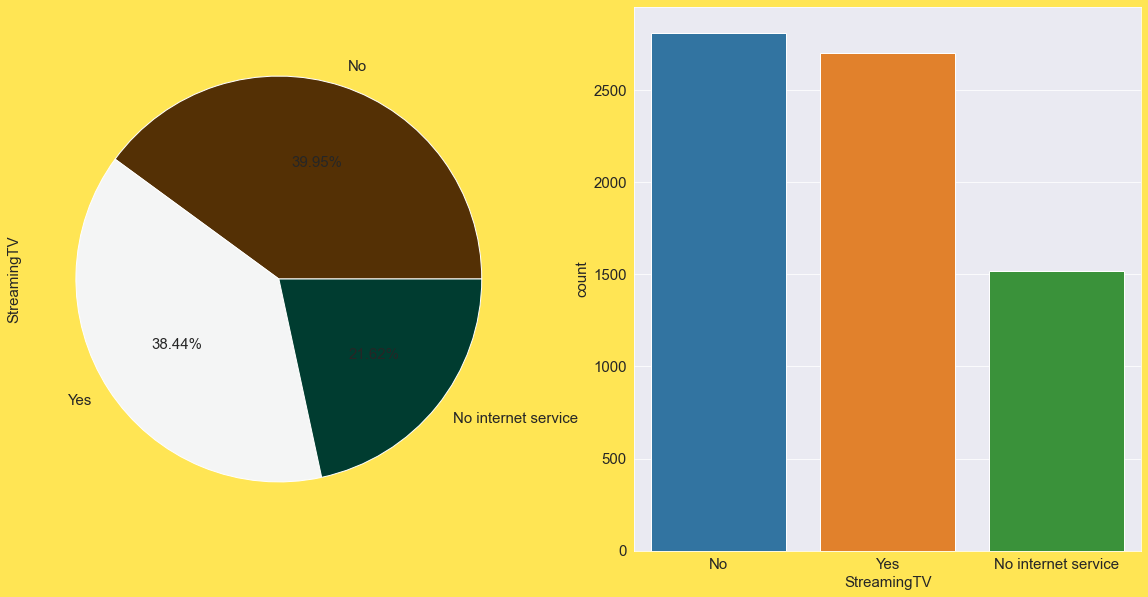

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


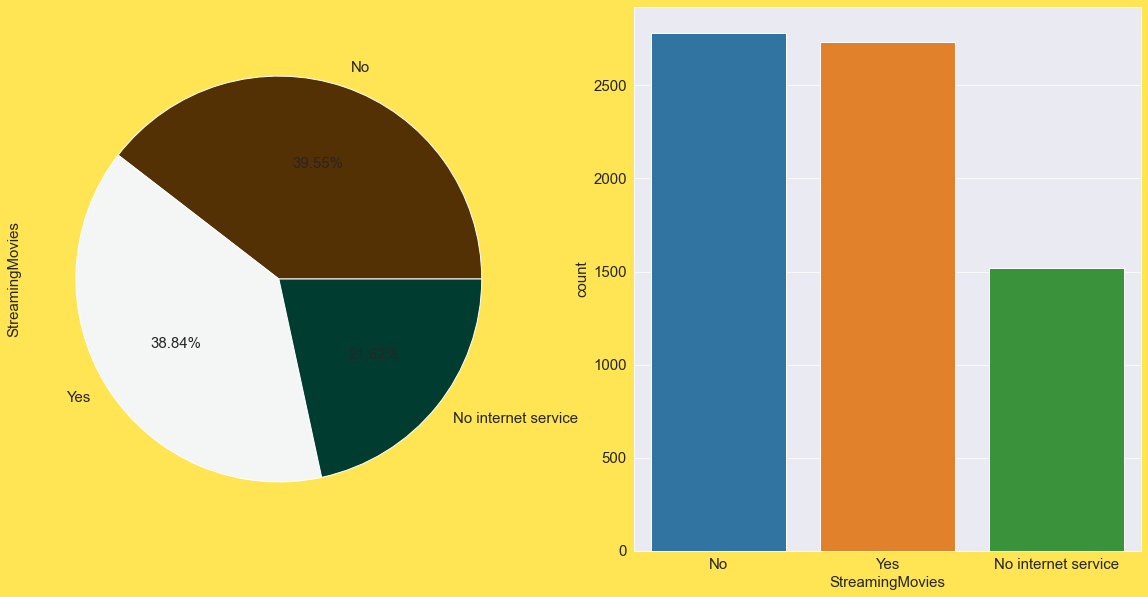

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64


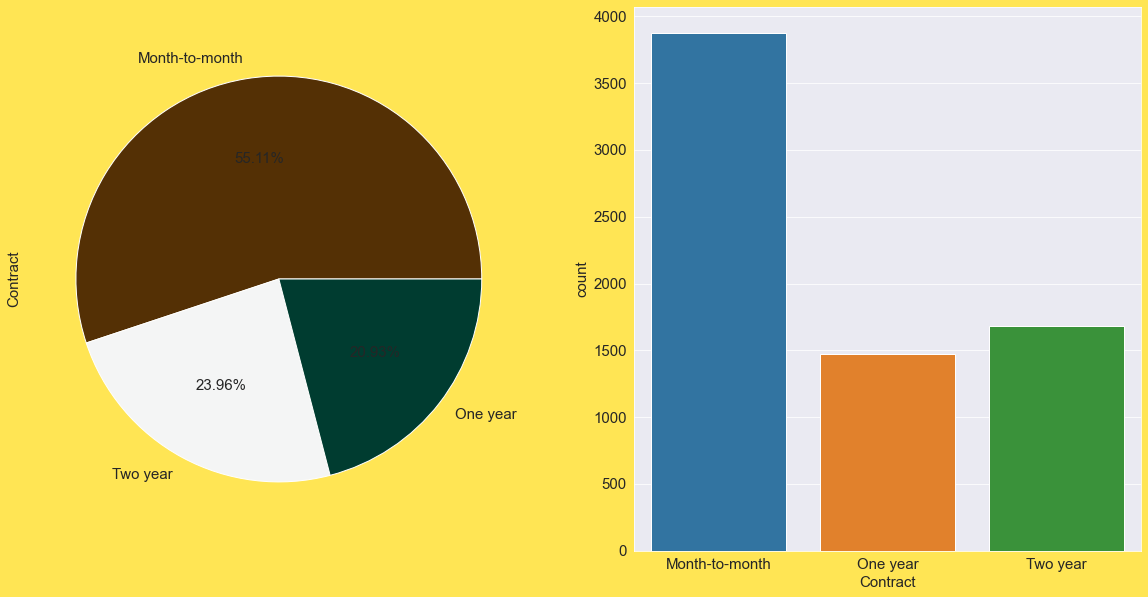

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64


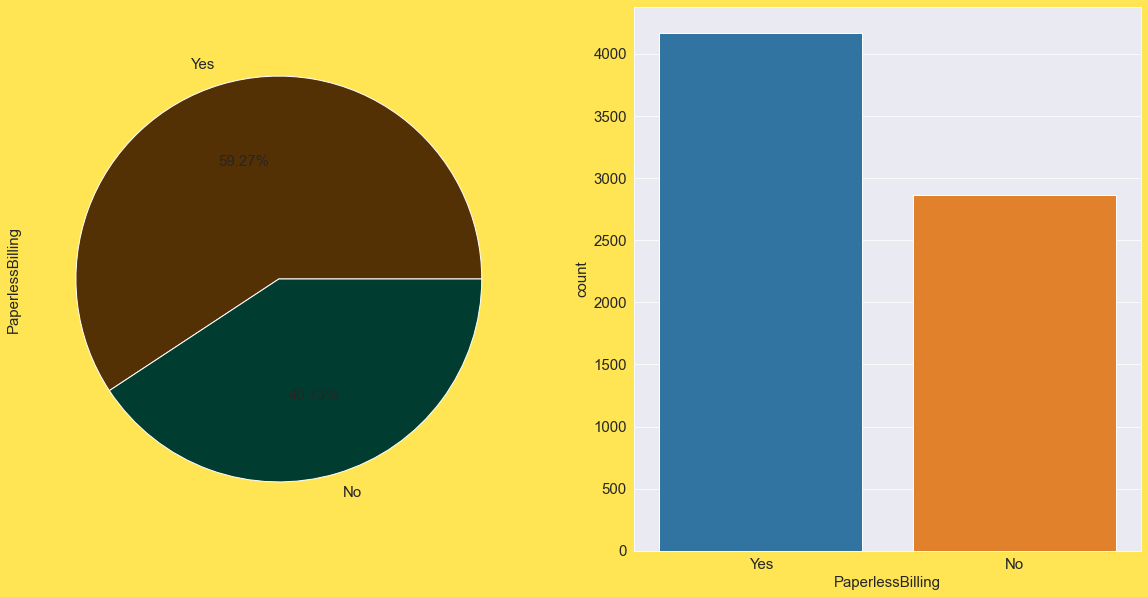

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64


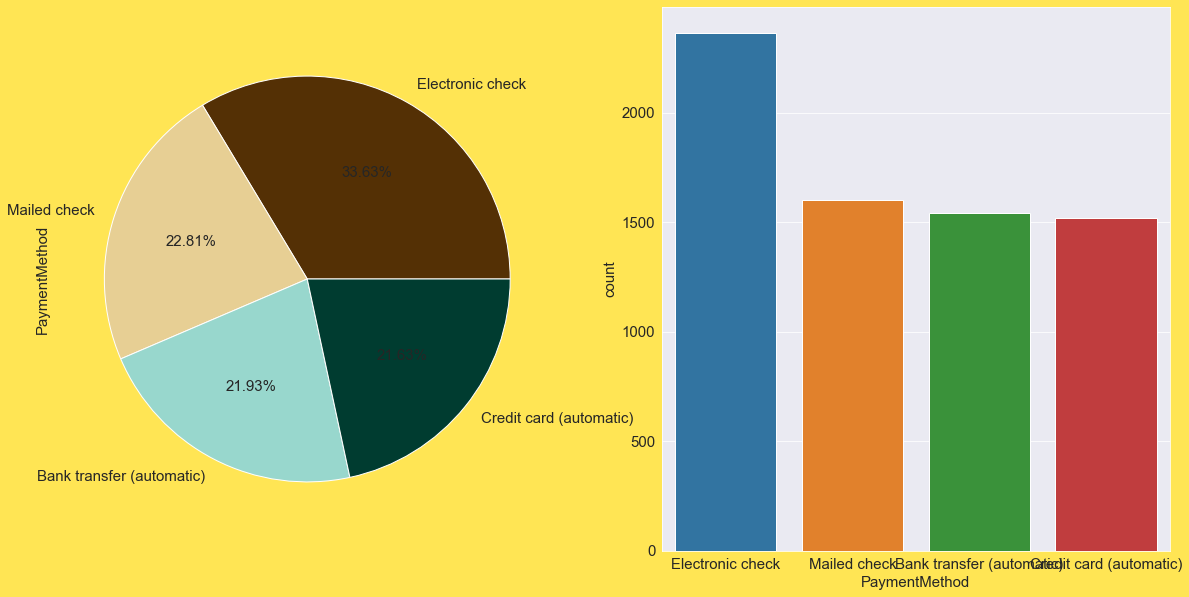

No     5163
Yes    1869
Name: Churn, dtype: int64


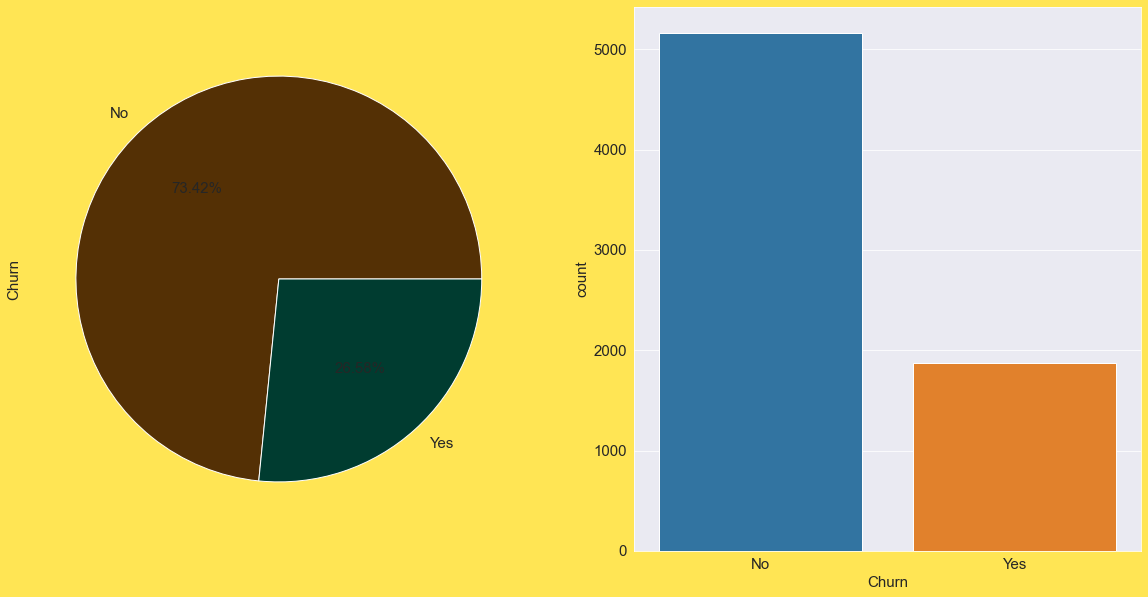

In [34]:
# plotting a bar plot and countplot to look at the catgeories
for i in cat_cols:
    
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,2)
    sns.countplot(i,data=churn)
    plt.subplot(1,2,1)
    churn[i].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'BrBG')
    print(churn[i].value_counts())
    plt.show()


Observations:-
    
-> There are almost equal number of men and women with men being 1% higher than women.

-> Partner ratio is also equal.

-> Interestingly most of the customers didn't have dependents

-> Morethan 90% has phone service

-> Many customers doesn't have or bought multiplelines service,also around 10% customers doesn't even have phone service.

-> Fiber optic internet service is being used by many people, which makes sense because people are using alot of internet these days.

-> Shockingly, Almost 50% of the customers are not choosing Online Security Service, and 21% doesn't have internet service.

-> Same with the OnlineBackup Services, Device Protection and Tech Support.

-> However there are people in similar % compared to who are using TV and movies streaming services and who are not usinh

-> Amost 55% are in monthly contract with the services,Surprisingly customers who are opting for 2year contract are higher in number than that are for 1 year.

-> Almost 60% of the customers make cashless transactions.

-> Electronic check being the most used payment method followed by mail check, bank transfer and credit card.

-> The number of No churn are significantly higher thaN yes

In [35]:
# Senior Citizen is a categorical encoded column
# so checking the value counts in it

0    5890
1    1142
Name: SeniorCitizen, dtype: int64


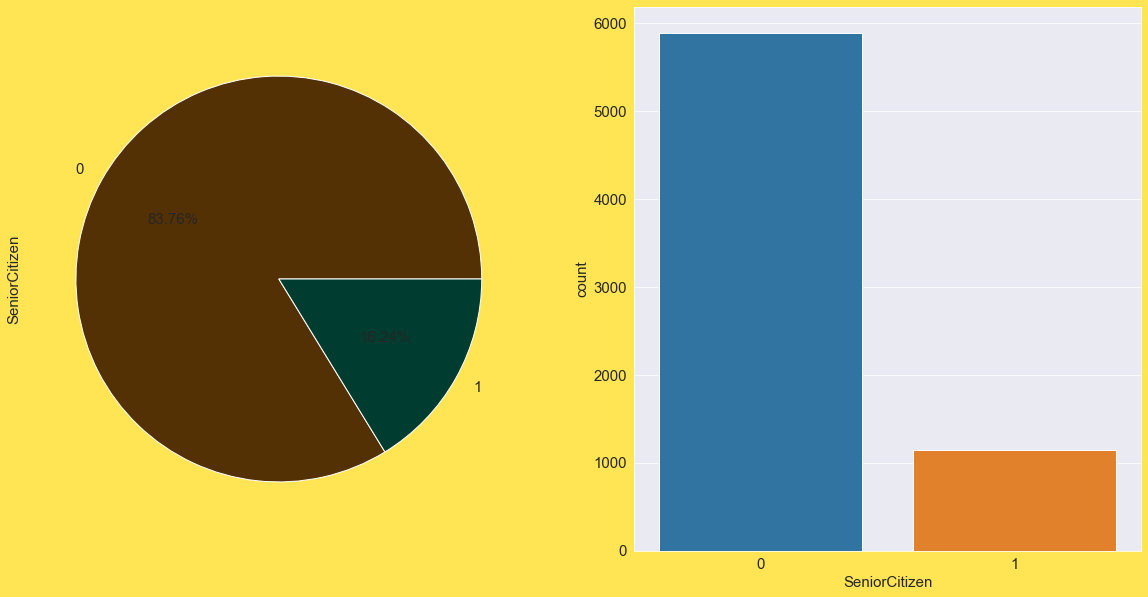

In [36]:
# plotting a count plot along with the pie plot
plt.figure(figsize=(20,10))
plt.subplot(1,2,2)
sns.countplot('SeniorCitizen',data=churn)
plt.subplot(1,2,1)
churn['SeniorCitizen'].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'BrBG')
print(churn['SeniorCitizen'].value_counts())
plt.show()

# More than 83% of the customers are adults and mid-aged 
# around 16% are SeniorCitizens

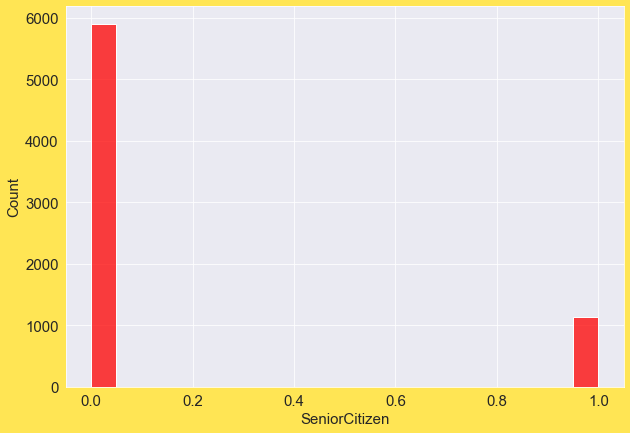

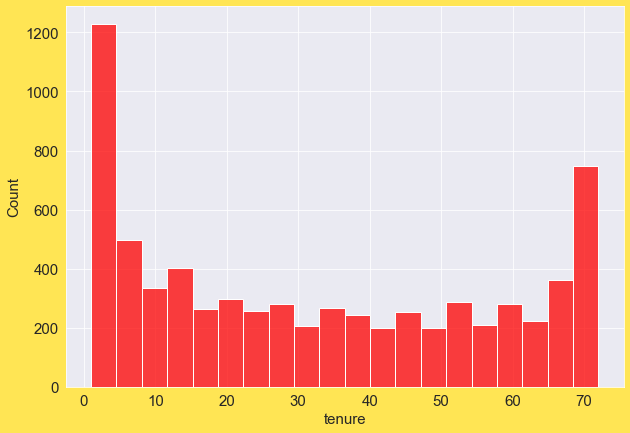

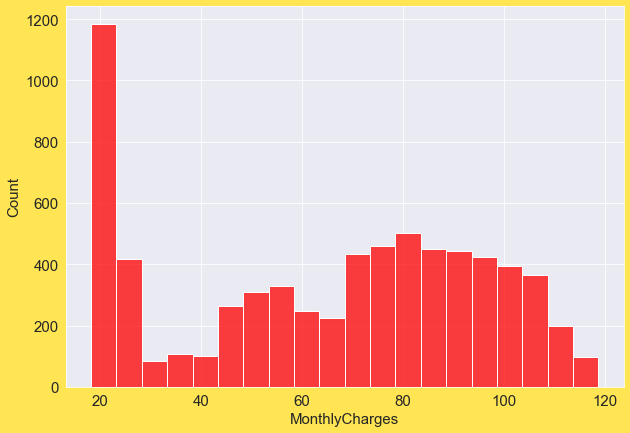

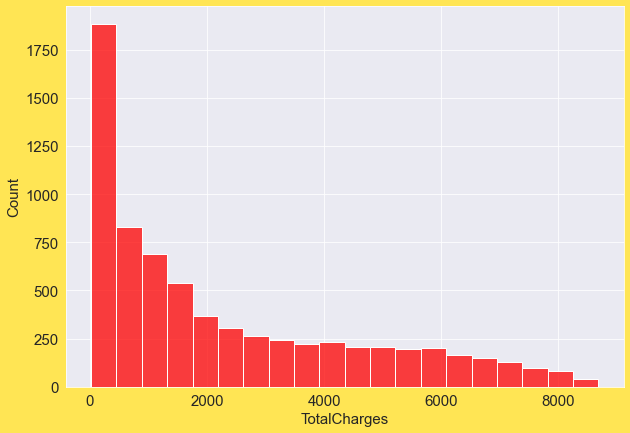

In [37]:
# plotting a histogram to check the values and distribution of cont_cols
for i in cont_cols:
    sns.histplot(churn[i],bins=20,color='red')
    plt.show()

Observations:-

-> We can observe that majority of tenure of the customer is 0-20, Although there few with 70

-> Majority of the customers pay 20$ as there monthly charges,which makes sense because, there are more monthly contract customers.

-> But we can see that most of the monthly charge amounts lie between 70-100 $ per customers.

-> And majority of the total charges amount ranges between 0-2000 $ 

## Bivariate Analysis

In [38]:
# taking out the predictor from the cat_cols
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [39]:
cat_cols.remove('Churn')

In [40]:
# churn removed
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [41]:
# Similarly taking out SeniorCitizen from cont_cols as well
cont_cols.remove('SeniorCitizen')

In [42]:
cont_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

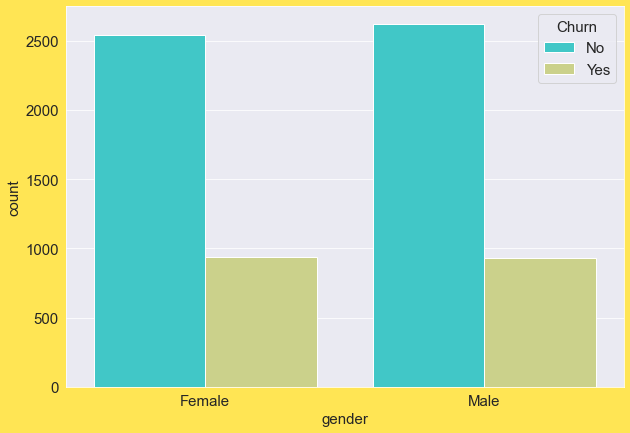

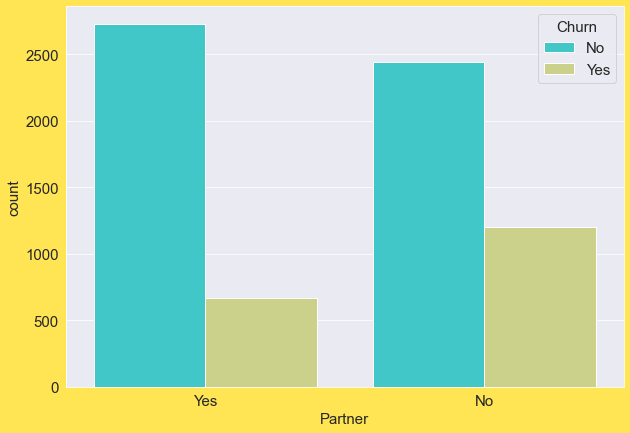

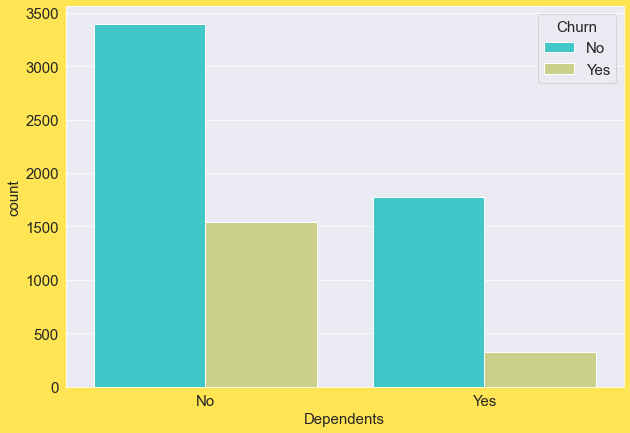

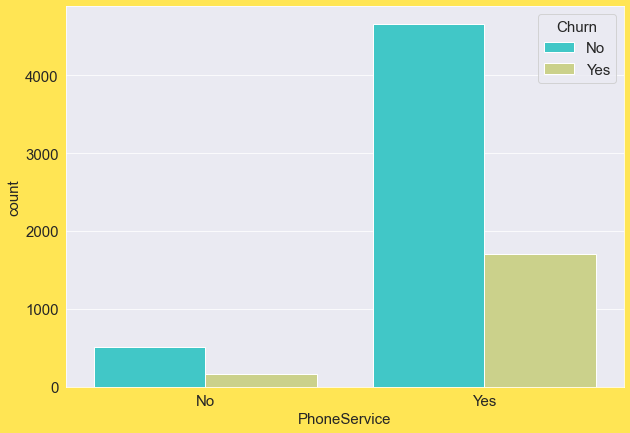

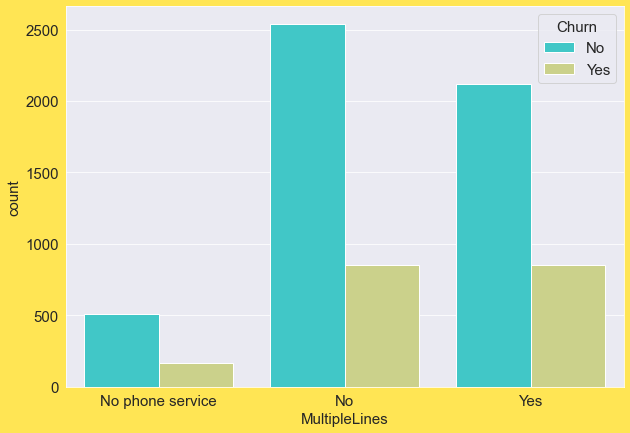

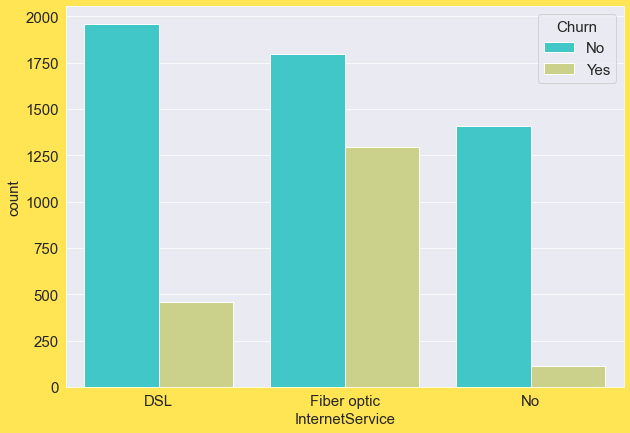

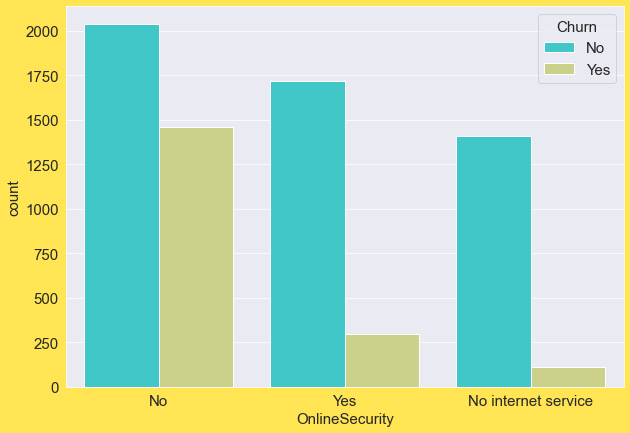

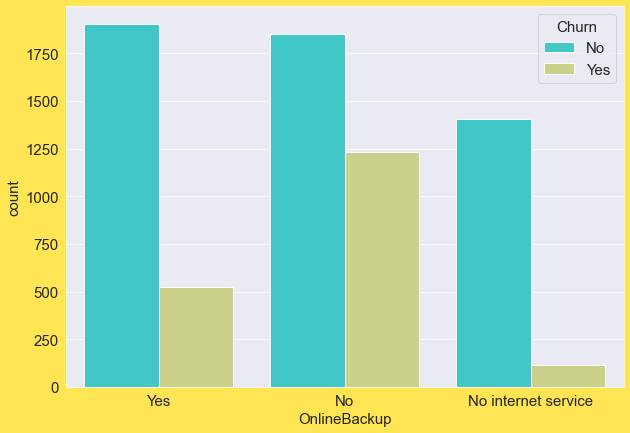

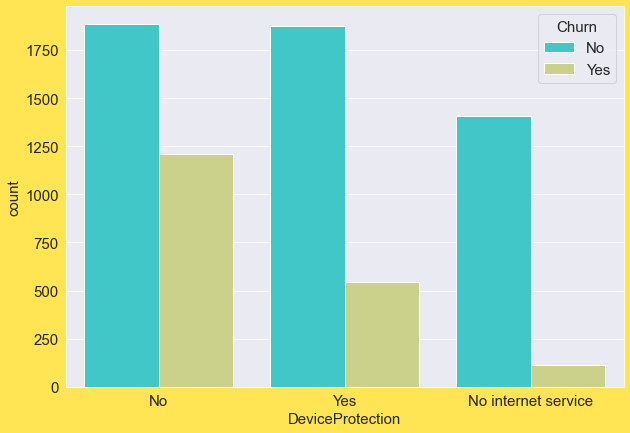

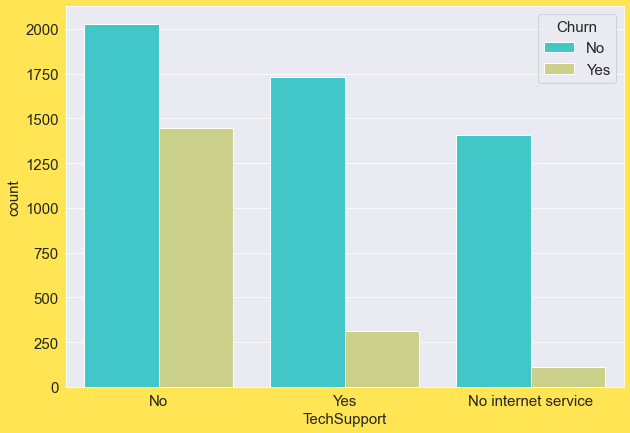

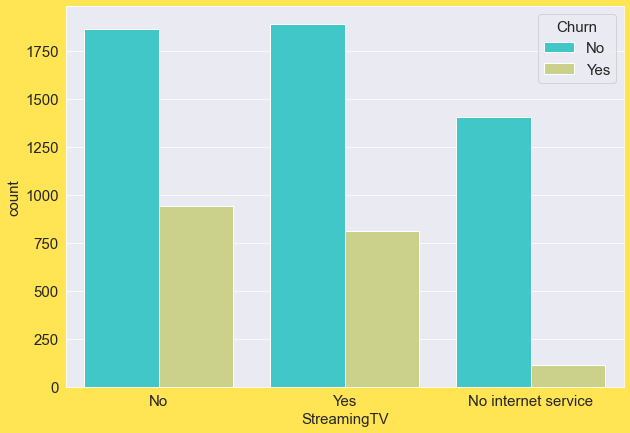

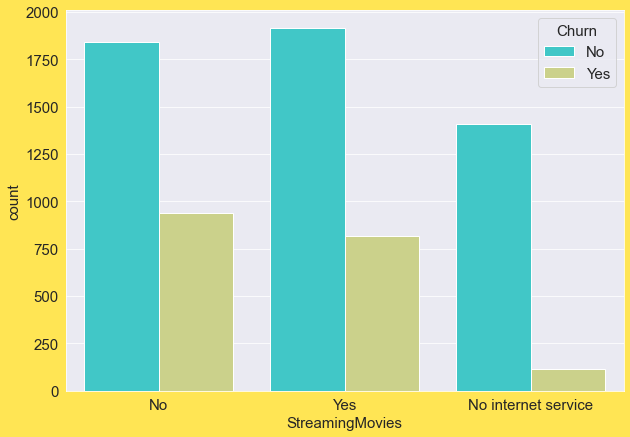

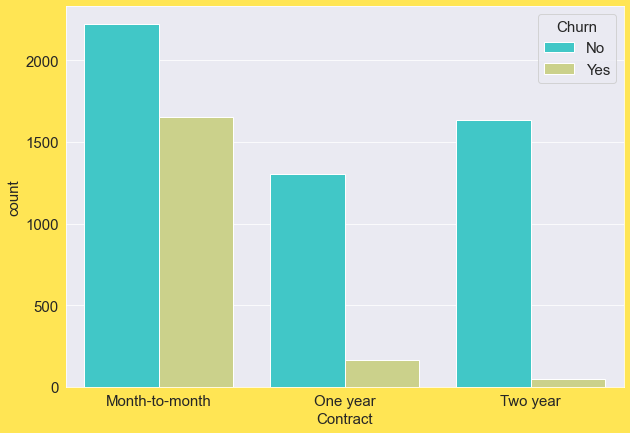

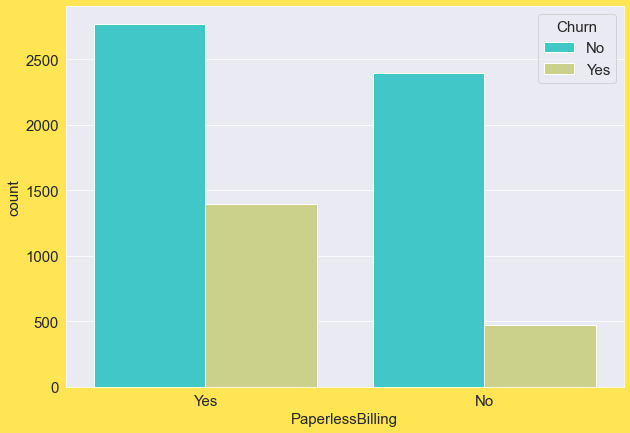

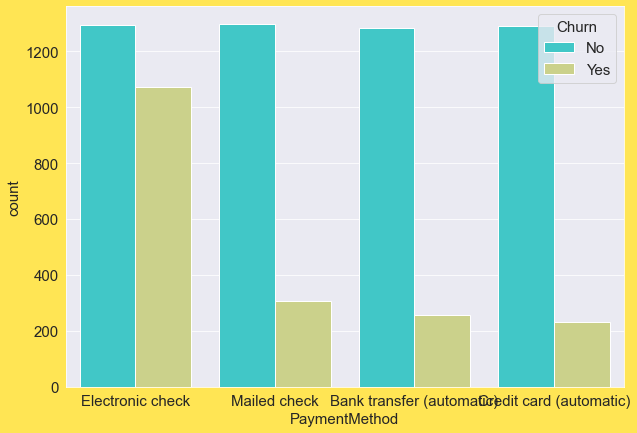

In [43]:
# plotting cat plot to know the relationship of the cat features with its target loan_status
for i in cat_cols:
    sns.countplot(churn[i],hue='Churn',data=churn,palette='rainbow')
    plt.show()

Observations:-
    
-> Men and women has equal churn rate

-> Customers who are not having partner or dependents are more likely to churn

-> There is a equal chance of churn in customers with and without multiple lines

-> Interestingly, customers who are using internet service are more likely to churn. It makes very much sense because
people these days easily change their internet service if they don't find it satisfactory or useful.

-> And people who doesn't use online security,OnlineBackup,Deviceprotection,tech support, tv and movie streaming  service are churning more.

-> There is a huge churn with customers who are in monthly contract or pay cashless and by electronic check.


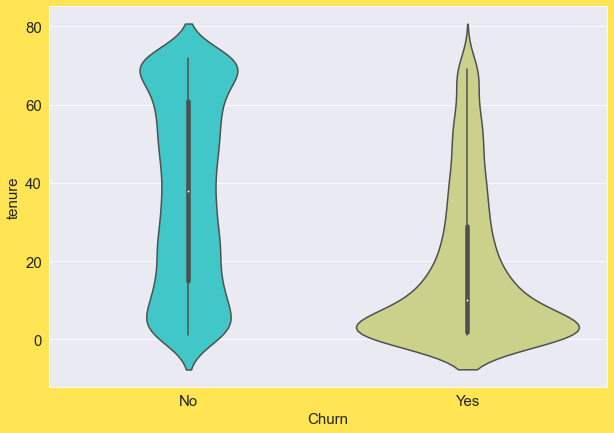

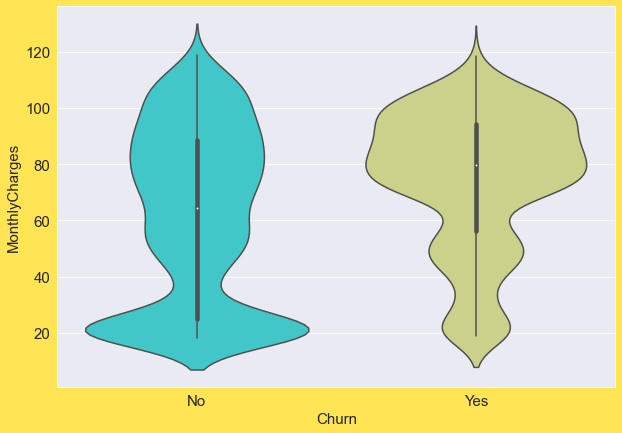

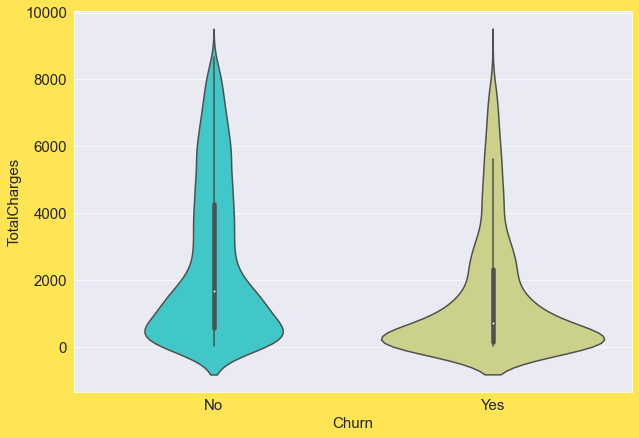

In [44]:
# plotting violinplot to see the relationship between the target and cont_cols
for i in cont_cols:
    sns.violinplot(churn['Churn'],churn[i],data=churn,palette='rainbow')
    plt.show()

Observations:-

-> Customer from 0-20 tenure time has significantly higher churn rate 

-> Customers paying 80-100 $ monthly are having higher churn rate.

-> Moreover, Total charges between 0-2000 paying customers are more likely to churn.

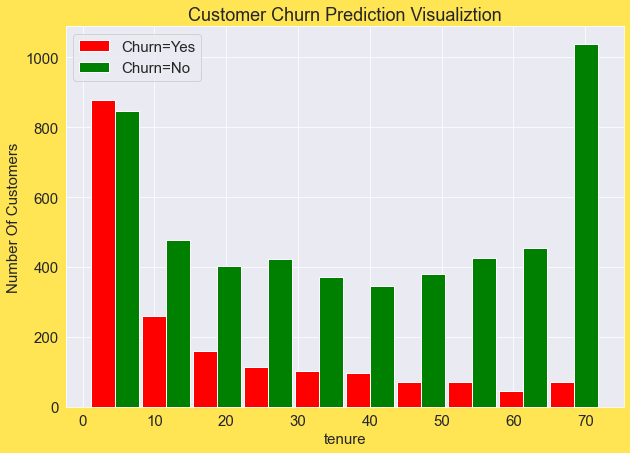

In [45]:
# plotting a histogram to check the customers churn with tenure
churn_no = churn[churn.Churn=='No'].tenure
churn_yes = churn[churn.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([churn_yes,churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()


Customers who are almost 70 months tenure are less likely to churn

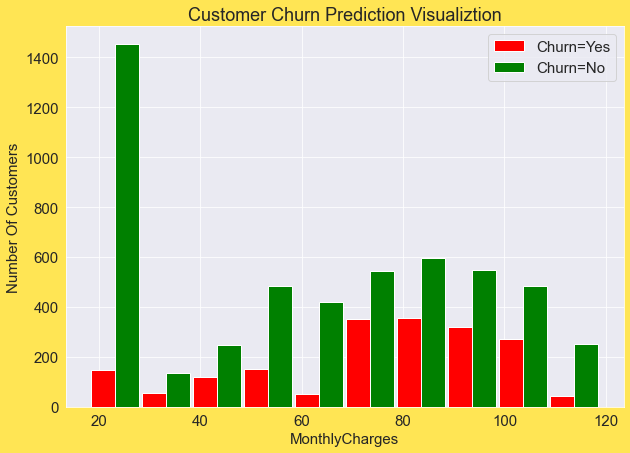

In [46]:
# plotting a histogram to check the customers churn with tenure
churn_no = churn[churn.Churn=='No'].MonthlyCharges
churn_yes = churn[churn.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([churn_yes,churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()


# As the monthly charges increases there is a steady increase in churn rate, however fell at more than 100 monthly charges

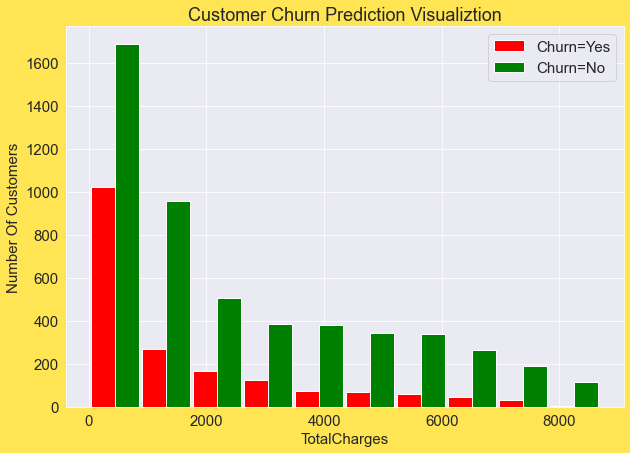

In [47]:
# plotting a histogram to check the customers churn with tenure
churn_no = churn[churn.Churn=='No'].TotalCharges
churn_yes = churn[churn.Churn=='Yes'].TotalCharges

plt.xlabel("TotalCharges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([churn_yes,churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

# We can see that the churn raate is decreasing as increase in the total charges
# Churn rate is more in the total charges amount range 0-2000

## Multivariate Analysis

<AxesSubplot:title={'center':'Comparision between Tenure and MonthlyCharges'}, xlabel='tenure', ylabel='MonthlyCharges'>

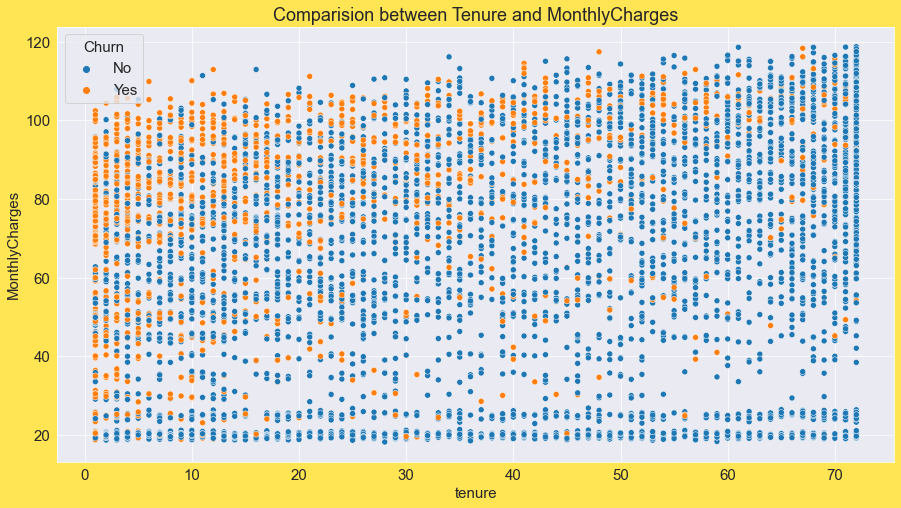

In [48]:
#Comparision between features using scatter plot
plt.figure(figsize=[15,8])
plt.title('Comparision between Tenure and MonthlyCharges')
sns.scatterplot(churn['tenure'],churn['MonthlyCharges'],hue=churn['Churn'])

<AxesSubplot:title={'center':'Comparision between Tenure and TotalCharges'}, xlabel='tenure', ylabel='TotalCharges'>

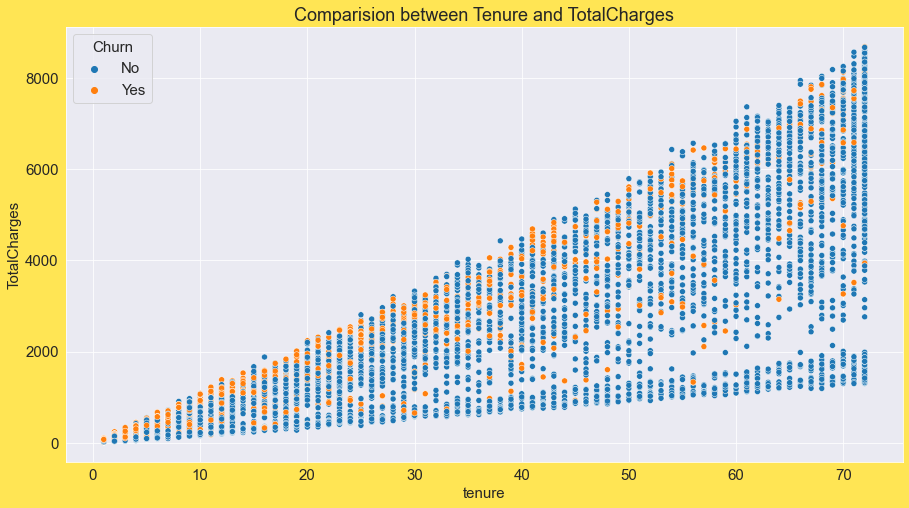

In [49]:
plt.figure(figsize=[15,8])
plt.title('Comparision between Tenure and TotalCharges')
sns.scatterplot(churn['tenure'],churn['TotalCharges'],hue=churn['Churn'])

# Interestingly,we can see that Total charges are increasing with the increase in tenure
# Although it is not impacting on the churn rate gradually

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Electronic check'),
  Text(1, 0, 'Mailed check'),
  Text(2, 0, 'Bank transfer (automatic)'),
  Text(3, 0, 'Credit card (automatic)')])

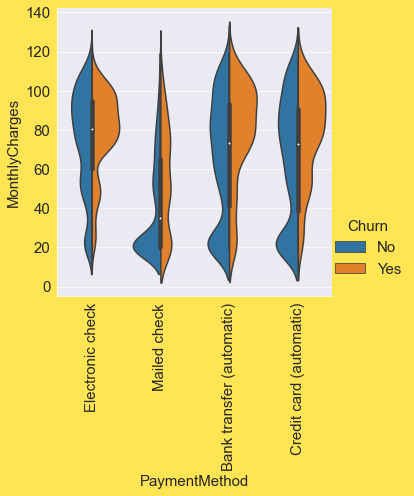

In [50]:
# Let's plot catplot for pair of features
# plt.figure(figsize=(20,50))
sns.catplot(x="PaymentMethod",y="MonthlyCharges",hue="Churn",kind="violin",data=churn,split=True)
plt.xticks(rotation = 90)

The churned rate is high for Credit card users and bank transfers.

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

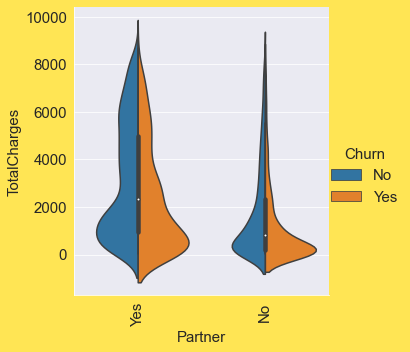

In [51]:
sns.catplot(x = "Partner", y = "TotalCharges", hue = "Churn", kind = "violin", data=churn, split=True)
plt.xticks(rotation=90)

The churned rate and total charges is high for customers with partners.

## Encoding the Target

In [52]:
# first encoding the target Loan_Status yes or no
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
churn['Churn']= le.fit_transform(churn['Churn'])

In [53]:
churn['Churn'].head()

# We can see that the target is encoded

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int32

In [54]:
# # Calaculating the % churn rate for each categorical variable

for i in cat_cols:
    print(churn.groupby(i)['Churn'].mean()*100)
    print('\n')

gender
Female    26.959518
Male      26.204565
Name: Churn, dtype: float64


Partner
No     32.976092
Yes    19.717065
Name: Churn, dtype: float64


Dependents
No     31.279140
Yes    15.531205
Name: Churn, dtype: float64


PhoneService
No     25.000000
Yes    26.747481
Name: Churn, dtype: float64


MultipleLines
No                  25.081241
No phone service    25.000000
Yes                 28.648466
Name: Churn, dtype: float64


InternetService
DSL            18.998344
Fiber optic    41.892765
No              7.434211
Name: Churn, dtype: float64


OnlineSecurity
No                     41.778667
No internet service     7.434211
Yes                    14.640199
Name: Churn, dtype: float64


OnlineBackup
No                     39.941691
No internet service     7.434211
Yes                    21.567010
Name: Churn, dtype: float64


DeviceProtection
No                     39.140271
No internet service     7.434211
Yes                    22.539289
Name: Churn, dtype: float64


TechSupport


In [55]:
churn.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [56]:
# looking at the pivot table between Gender and Monthly charges comparing the churn rate
churn.pivot_table('Churn',index='gender',columns='Dependents')*100

# Interestingly we can see that women who doesn't have any dependents are having less churn rate

Dependents         No        Yes
gender                          
Female      31.463415  16.129032
Male        31.095835  14.962825

<AxesSubplot:xlabel='gender'>

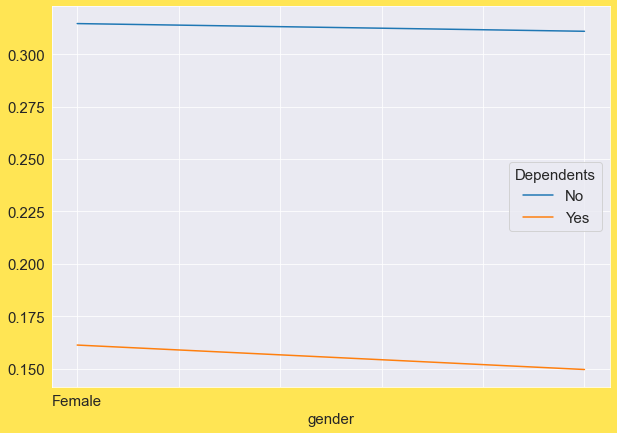

In [57]:
# plotting the same
churn.pivot_table('Churn',index='gender',columns='Dependents').plot()

In [58]:
# plotting the pivot for gender and contract
churn.pivot_table('Churn',index='gender',columns='Contract')*100

Contract  Month-to-month   One year  Two year
gender                                       
Female         43.740260  10.445682  2.619048
Male           41.692308  12.068966  3.076923

<AxesSubplot:xlabel='gender'>

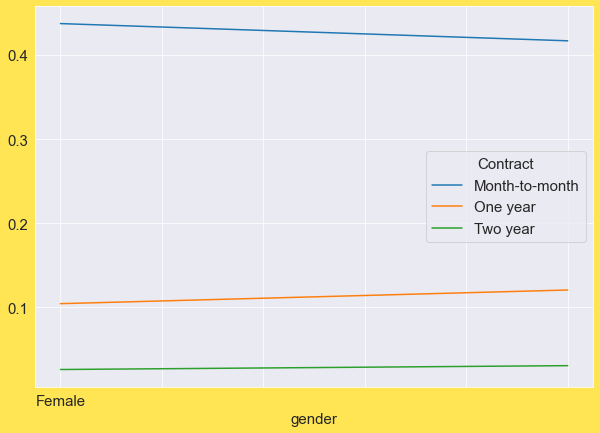

In [59]:
# plotting the pivot for gender and contract
churn.pivot_table('Churn',index='gender',columns='Contract').plot()



<AxesSubplot:xlabel='gender'>

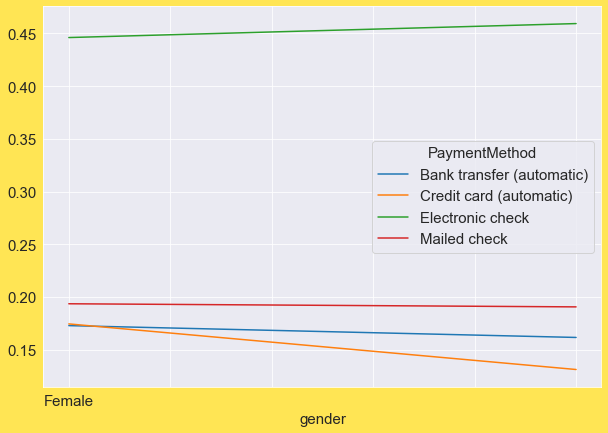

In [60]:
# plotting the pivot for gender and contract
churn.pivot_table('Churn',index='gender',columns='PaymentMethod').plot()

# Bank transfer and credit card payments are having less churn rate 

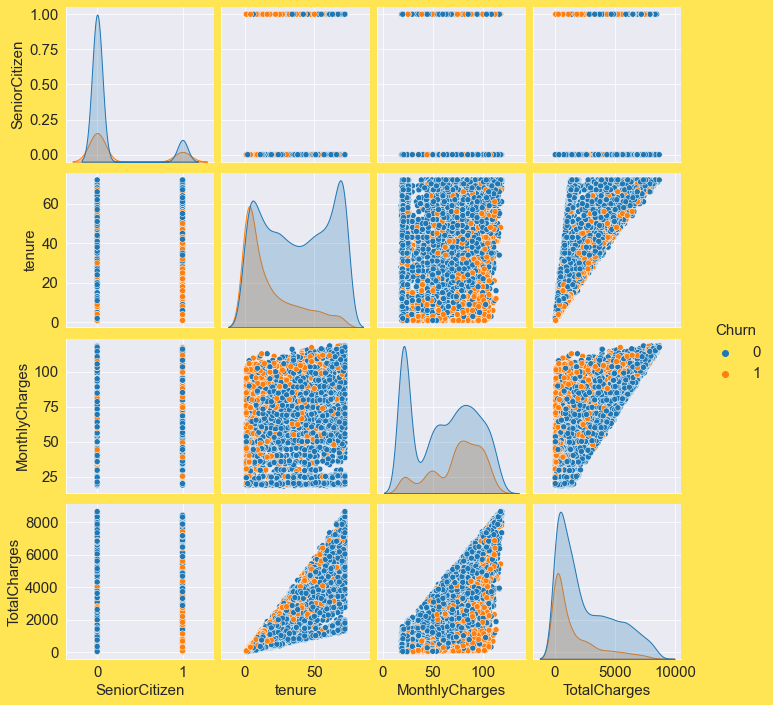

In [61]:
# Plotting a pairplot with respect to the target Churn
sns.pairplot(churn,hue='Churn')

# We can see that these feature are having good correlation with the target
# And skewness and outliers are present
# We might have to check for multicollinearity

## Encoding the fetaures

In [62]:
# before encoding let's check the unique values
# unique values
for i in churn.columns:
    print(i,':',churn[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [63]:
# Here we are having No internet service as common in all the services columns
# which means there are not having internet or phone service so there don't use that service
# which is nothing but No
# So we can replace all the constraint categories No internet service and phone service as No
churn["MultipleLines"].replace("No phone service","No",inplace=True)

churn["OnlineSecurity"].replace("No internet service","No",inplace=True)

churn["OnlineBackup"].replace("No internet service","No",inplace=True)

churn["DeviceProtection"].replace("No internet service","No",inplace=True)

churn["TechSupport"].replace("No internet service","No",inplace=True)

churn["StreamingTV"].replace("No internet service","No",inplace=True)

churn["StreamingMovies"].replace("No internet service","No",inplace=True)

In [64]:
# checking the unique values again
for i in churn.columns:
    print(i,':',churn[i].unique())
    
# We can see the No internet and phone service category is removed

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [65]:
# Here most of the columns are have only two categorical variables with yes no
# So we can just simply replace them with 1 and  0
# making a list instance of yes or no columns
yesno_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in yesno_cols:
    churn[i].replace({'Yes': 1,'No': 0},inplace=True) # using a dict in replace method

In [66]:
# checking the unique values again
for i in churn.columns:
    print(i,':',churn[i].unique())
    
# We can see that the yes or no columns have been encoded

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [67]:
# Also we have male and female
# As it is also a binary categorical, we can replace it with 0 and 1
churn['gender'].replace({'Female':1,'Male':0},inplace=True)

In [68]:
# looking at the unique values of  gender again
churn['gender'].unique()

# We can see that they are encoded

array([1, 0], dtype=int64)

In [69]:
# Now we have 3 categorical columns which have more than two categories
# For this we have to encode using onehot encoding or get dummies method
# getting the three columns and instancing them in a list
onehot = churn.dtypes[churn.dtypes == 'object'].index.tolist()
onehot

['InternetService', 'Contract', 'PaymentMethod']

In [70]:
# using onehot encoding
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first') # We are dropping one dummy column from each encoded feature to avoid multicollinearity

df_object = churn.select_dtypes('object')
ohe.fit(df_object)

codes = ohe.transform(df_object).toarray()
feature_names = ohe.get_feature_names(onehot)

churn_new = pd.concat([churn.select_dtypes(exclude='object'),
pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

In [71]:
# checking the df
churn_new.head()

# We can see that all the categorical columns are encoded

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     1.0            0.0      1.0         0.0     1.0           0.0   
1     0.0            0.0      0.0         0.0    34.0           1.0   
2     0.0            0.0      0.0         0.0     2.0           1.0   
3     0.0            0.0      0.0         0.0    45.0           0.0   
4     1.0            0.0      0.0         0.0     2.0           1.0   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0            0.0             0.0           1.0               0.0          0.0   
1            0.0             1.0           0.0               1.0          0.0   
2            0.0             1.0           1.0               0.0          0.0   
3            0.0             1.0           0.0               1.0          1.0   
4            0.0             0.0           0.0               0.0          0.0   

   StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  \
0          0.0              0.0               1.0           29.85   
1          0.0              0.0               0.0           56.95   
2          0.0              0.0               1.0           53.85   
3          0.0              0.0               0.0           42.30   
4          0.0              0.0               1.0           70.70   

   TotalCharges  Churn  InternetService_Fiber optic  InternetService_No  \
0         29.85    0.0                          0.0                 0.0   
1       1889.50    0.0                          0.0                 0.0   
2        108.15    1.0                          0.0                 0.0   
3       1840.75    0.0                          0.0                 0.0   
4        151.65    1.0                          1.0                 0.0   

   Contract_One year  Contract_Two year  \
0                0.0                0.0   
1                1.0                0.0   
2                0.0                0.0   
3                1.0                0.0   
4                0.0                0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  
0                         0.0  
1                         1.0  
2                         1.0  
3                         0.0  
4                         0.0

In [72]:
print('Before: ',churn.shape)
print('After: ',churn_new.shape)

# We got 4 new columns

Before:  (7032, 20)
After:  (7043, 24)


## Checking and Treating Outliers

In [73]:
cont_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

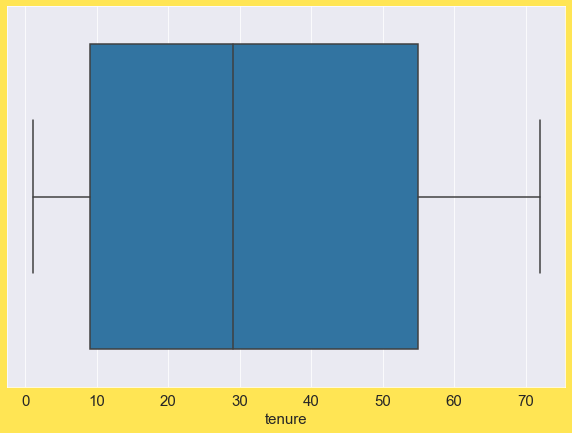

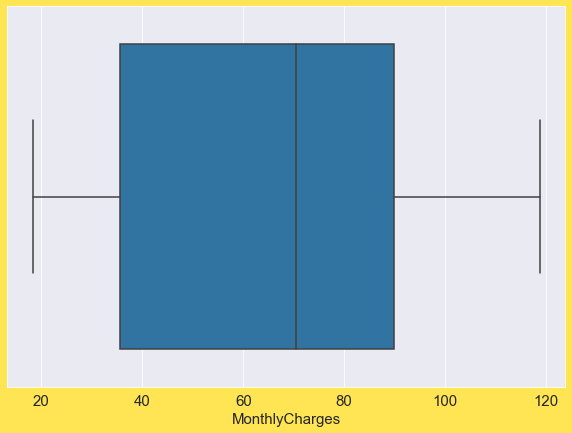

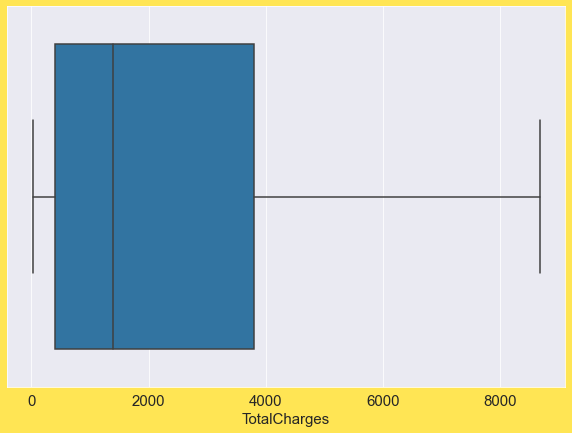

In [74]:
# plotting outliers in continuos columns
for i in cont_cols:
    sns.boxplot(churn_new[i])
    plt.show()
    
# We can observe there are 

In [75]:
# We seem to have got null values after using onehot encoding
# we can just drop them
# They are nothing but missing dummy values from the dummy variables
churn_new.dropna(inplace=True)

In [76]:
churn_new.isnull().sum()
# removed

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMeth

## Checking the Skewness and Treating it

In [77]:
# Checking in continuous columns
churn_new[cont_cols].skew().sort_values()

MonthlyCharges   -0.221398
tenure            0.237531
TotalCharges      0.961613
dtype: float64

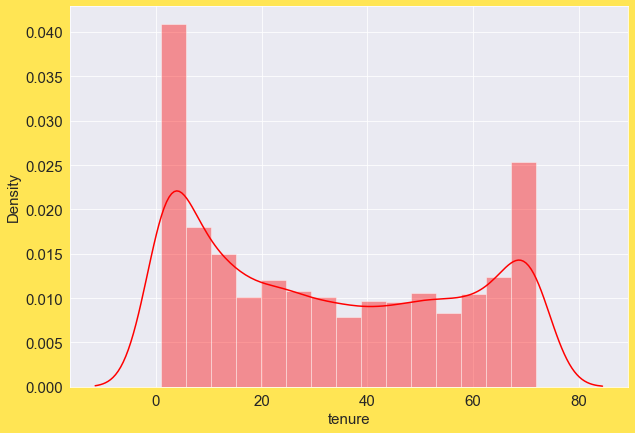

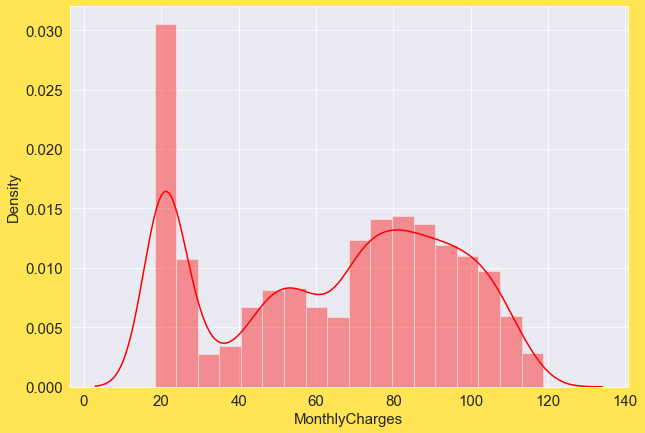

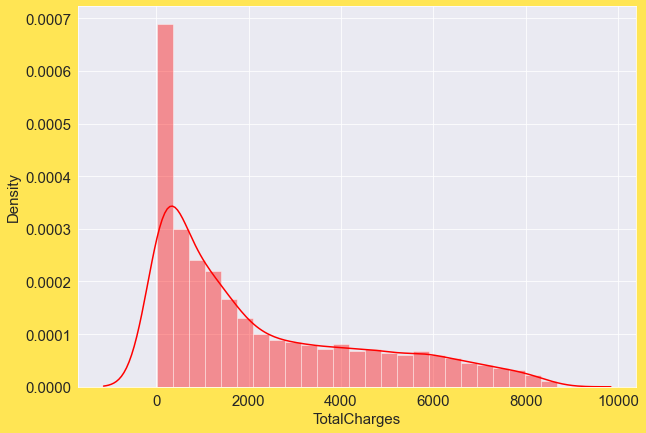

In [78]:
# plotting visually
# checking skewnss
for i in cont_cols:
    sns.distplot(churn_new[i],color='red')
    plt.show()

# We can see the skewness
# We can observe there is high skewness in Total Charges

In [79]:
# Reducing the skewness using Powertransformer using yeo-johnson method
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [80]:
churn_new[['TotalCharges']] = scaler.fit_transform(churn_new[['TotalCharges']].values)

In [81]:
# checking the skewness again
churn_new[cont_cols].skew().sort_values()
# we can see that the skewness is completely removed from TotalCharges

MonthlyCharges   -0.221398
TotalCharges     -0.144752
tenure            0.237531
dtype: float64

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

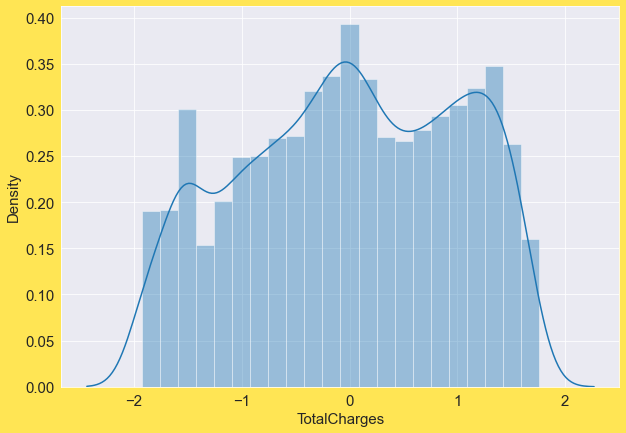

In [82]:
# plotting again
sns.distplot(churn_new['TotalCharges'])

# We can see that the skewness is completely reduced

## Correlation

In [83]:
# correlation and using transpose 
churn_new.corr().T

gender  SeniorCitizen   Partner  \
gender                                 1.000000       0.002531  0.001247   
SeniorCitizen                          0.002531       1.000000  0.016793   
Partner                                0.001247       0.016793  1.000000   
Dependents                            -0.010768      -0.210423  0.451744   
tenure                                -0.005961       0.016729  0.382967   
PhoneService                           0.008547       0.007959  0.018593   
MultipleLines                          0.009063       0.142375  0.142128   
OnlineSecurity                         0.016263      -0.038037  0.143307   
OnlineBackup                           0.012112       0.067223  0.142056   
DeviceProtection                       0.000402       0.060339  0.153791   
TechSupport                            0.008744      -0.060207  0.120432   
StreamingTV                            0.007019       0.106470  0.124922   
StreamingMovies                        0.010008       0.120617  0.117952   
PaperlessBilling                       0.012317       0.156289 -0.013946   
MonthlyCharges                         0.014299       0.220143  0.098084   
TotalCharges                           0.002489       0.107011  0.345277   
Churn                                  0.008795       0.149517 -0.150152   
InternetService_Fiber optic           -0.004707       0.002676 -0.021271   
InternetService_No                     0.011436       0.010965  0.000521   
Contract_One year                     -0.007484      -0.008395  0.016078   
Contract_Two year                      0.008534      -0.004621  0.020106   
PaymentMethod_Credit card (automatic)  0.014550      -0.002628  0.016820   
PaymentMethod_Electronic check         0.003274      -0.002743  0.000216   
PaymentMethod_Mailed check            -0.017035       0.014770 -0.014127   

                                       Dependents    tenure  PhoneService  \
gender                                  -0.010768 -0.005961      0.008547   
SeniorCitizen                           -0.210423  0.016729      0.007959   
Partner                                  0.451744  0.382967      0.018593   
Dependents                               1.000000  0.163658     -0.000627   
tenure                                   0.163658  1.000000      0.007018   
PhoneService                            -0.000627  0.007018      1.000000   
MultipleLines                           -0.024739  0.333072      0.279287   
OnlineSecurity                           0.080308  0.328539     -0.091520   
OnlineBackup                             0.023541  0.361220     -0.051851   
DeviceProtection                         0.013526  0.361365     -0.070039   
TechSupport                              0.063020  0.325906     -0.094878   
StreamingTV                             -0.016729  0.280150     -0.021372   
StreamingMovies                         -0.039018  0.285513     -0.033303   
PaperlessBilling                        -0.110394  0.004448      0.016218   
MonthlyCharges                          -0.112454  0.246816      0.247773   
TotalCharges                             0.087030  0.867392      0.084143   
Churn                                   -0.162802 -0.354249      0.011129   
InternetService_Fiber optic             -0.015154 -0.017049      0.035261   
InternetService_No                      -0.001418  0.011417      0.009951   
Contract_One year                        0.002951  0.018067      0.005985   
Contract_Two year                        0.018863  0.062564     -0.009686   
PaymentMethod_Credit card (automatic)   -0.001338  0.019974      0.004429   
PaymentMethod_Electronic check           0.003402 -0.039118     -0.002046   
PaymentMethod_Mailed check               0.005229 -0.001364      0.015636   

                                       MultipleLines  OnlineSecurity  \
gender                                      0.009063        0.016263   
SeniorCitizen                               0.142375       -0.038037  

<AxesSubplot:>

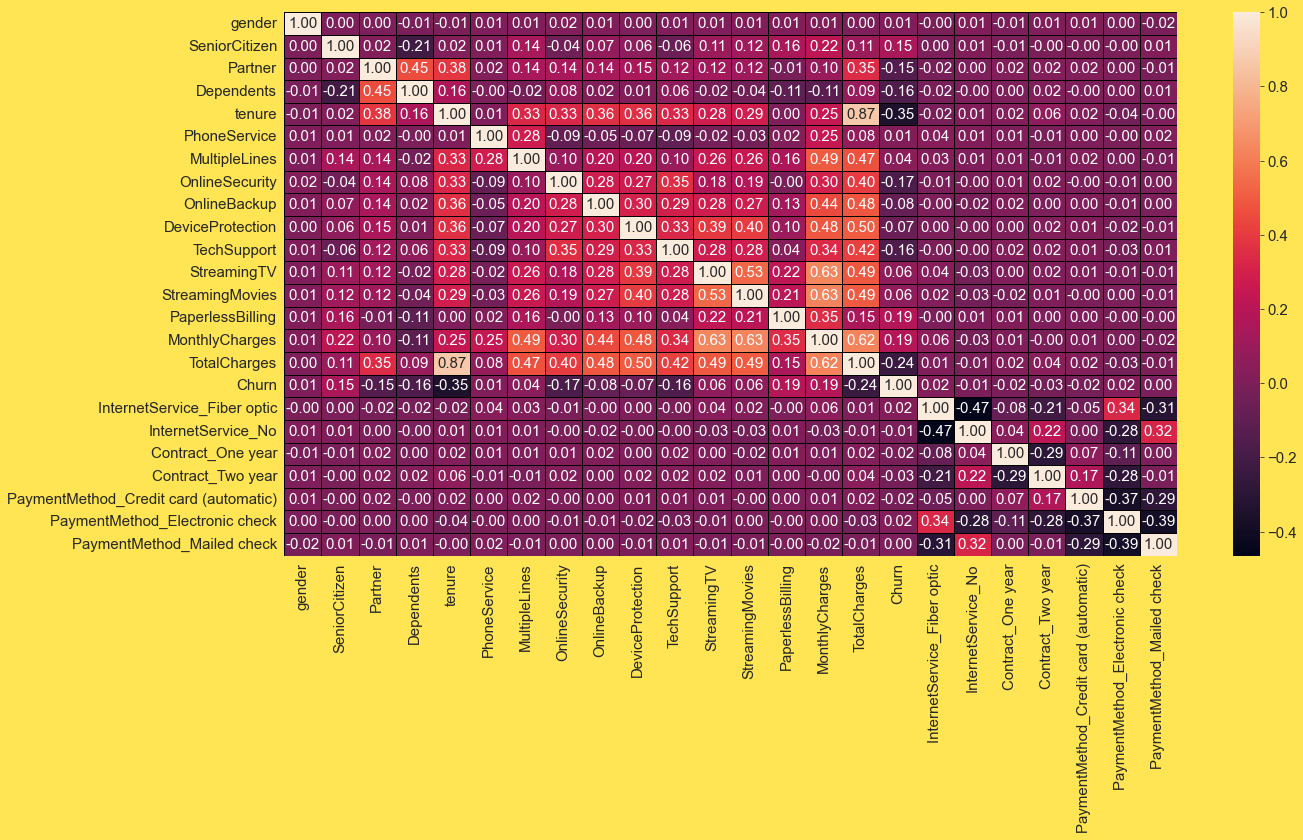

In [84]:
# plotting a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(churn_new.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

Observations:-


-> We can see that there is a multicolinearity issue between tenure and TotalCharges,Contract and tenure.

-> With target gender is very less correlated.

-> There seems to be no multicollinearity between the columns

-> MonthlyCharges,PaperlessBilling, SeniorCitizen have the highest positive correlation with Churn, while Contract,tenure,TechSupport,TotalCharges,OnlineBackup,DeviceProtection have the highest negative correlation with Churn.

In [85]:
# We can observe this clearly with corr with respect to target seperated
churn_new.corr()['Churn'].sort_values()

tenure                                  -0.354249
TotalCharges                            -0.236751
OnlineSecurity                          -0.171502
TechSupport                             -0.164389
Dependents                              -0.162802
Partner                                 -0.150152
OnlineBackup                            -0.082550
DeviceProtection                        -0.066064
Contract_Two year                       -0.027975
PaymentMethod_Credit card (automatic)   -0.021902
Contract_One year                       -0.015017
InternetService_No                      -0.009542
PaymentMethod_Mailed check               0.002686
gender                                   0.008795
PhoneService                             0.011129
PaymentMethod_Electronic check           0.019456
InternetService_Fiber optic              0.022750
MultipleLines                            0.039027
StreamingMovies                          0.061678
StreamingTV                              0.063775


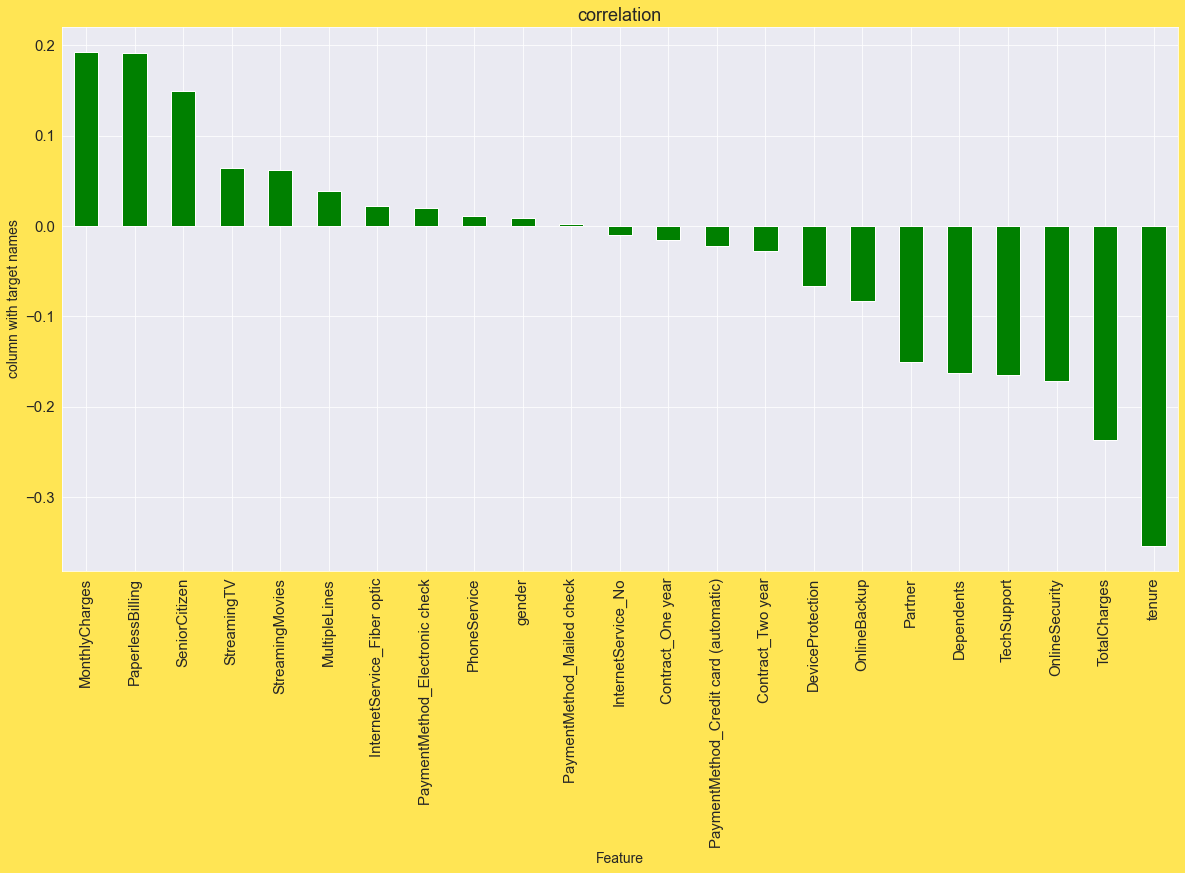

In [86]:
# plotting the same 
# plotting a bar graph to understand the same
plt.figure(figsize=(20,10))
churn_new.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='green')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

## Scaling the data

In [87]:
# We have to check multicollinearity
# We have to scale the data before checking it
# We can see that all the column values are in the range 0 to 1 
# We need to scale only the total charges,tenure and monthly charges
churn_new.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     1.0            0.0      1.0         0.0     1.0           0.0   
1     0.0            0.0      0.0         0.0    34.0           1.0   
2     0.0            0.0      0.0         0.0     2.0           1.0   
3     0.0            0.0      0.0         0.0    45.0           0.0   
4     1.0            0.0      0.0         0.0     2.0           1.0   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0            0.0             0.0           1.0               0.0          0.0   
1            0.0             1.0           0.0               1.0          0.0   
2            0.0             1.0           1.0               0.0          0.0   
3            0.0             1.0           0.0               1.0          1.0   
4            0.0             0.0           0.0               0.0          0.0   

   StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  \
0          0.0              0.0               1.0           29.85   
1          0.0              0.0               0.0           56.95   
2          0.0              0.0               1.0           53.85   
3          0.0              0.0               0.0           42.30   
4          0.0              0.0               1.0           70.70   

   TotalCharges  Churn  InternetService_Fiber optic  InternetService_No  \
0     -1.809718    0.0                          0.0                 0.0   
1      0.254461    0.0                          0.0                 0.0   
2     -1.385833    1.0                          0.0                 0.0   
3      0.233423    0.0                          0.0                 0.0   
4     -1.248571    1.0                          1.0                 0.0   

   Contract_One year  Contract_Two year  \
0                0.0                0.0   
1                1.0                0.0   
2                0.0                0.0   
3                1.0                0.0   
4                0.0                0.0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             1.0   

   PaymentMethod_Mailed check  
0                         0.0  
1                         1.0  
2                         1.0  
3                         0.0  
4                         0.0

In [88]:
# lets scale them using MinMaxScaler
scale_cols = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler # importing minmaxscaler
mms = MinMaxScaler()
churn_new[scale_cols] = mms.fit_transform(churn_new[scale_cols])

In [89]:
# checking the unique values again
for i in churn_new.columns:
    print(i,':',churn_new[i].unique())

# We can observe all the columns have been scaled

gender : [1. 0.]
SeniorCitizen : [0. 1.]
Partner : [1. 0.]
Dependents : [0. 1.]
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService : [0. 1.]
MultipleLines : [0. 1.]
OnlineSecurity : [0. 1.]
OnlineBackup : [1. 0.]
DeviceProtect

### Seperating the target and features

In [90]:
x = churn_new.drop(['Churn'],axis=1)
y = churn_new['Churn']

In [91]:
x.shape

(7021, 23)

In [92]:
y.shape

(7021,)

###  Checking Multicollinearity

In [93]:
# importing vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# creating a dataframe inside a function to view the column names and vif score
def vif_calc():
    vif=pd.DataFrame()
    vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif["Features"]=x.columns
    return vif

In [95]:
vif_calc()

vif_Features                               Features
0       1.913436                                 gender
1       1.357340                          SeniorCitizen
2       2.825762                                Partner
3       1.943760                             Dependents
4      23.476146                                 tenure
5       9.119303                           PhoneService
6       2.617028                          MultipleLines
7       1.881844                         OnlineSecurity
8       2.212390                           OnlineBackup
9       2.330099                       DeviceProtection
10      1.931408                            TechSupport
11      3.075532                            StreamingTV
12      3.101297                        StreamingMovies
13      2.773519                       PaperlessBilling
14     21.236838                         MonthlyCharges
15     61.660685                           TotalCharges
16      2.340193            InternetService_Fiber optic
17      1.721848                     InternetService_No
18      1.422670                      Contract_One year
19      1.657016                      Contract_Two year
20      1.813750  PaymentMethod_Credit card (automatic)
21      2.460666         PaymentMethod_Electronic check
22      1.987094             PaymentMethod_Mailed check

In [96]:
# We can see that total charges is having high vif
# lets drop TotalCharges and check the score again
x.drop(['TotalCharges'],axis=1,inplace=True)

In [97]:
vif_calc()

# We can see that the multicollinearity issue is resolved

vif_Features                               Features
0       1.907179                                 gender
1       1.355003                          SeniorCitizen
2       2.820530                                Partner
3       1.940412                             Dependents
4       4.573116                                 tenure
5       8.926102                           PhoneService
6       2.616116                          MultipleLines
7       1.864081                         OnlineSecurity
8       2.201347                           OnlineBackup
9       2.318624                       DeviceProtection
10      1.919388                            TechSupport
11      3.073754                            StreamingTV
12      3.096949                        StreamingMovies
13      2.760193                       PaperlessBilling
14     14.746294                         MonthlyCharges
15      2.331560            InternetService_Fiber optic
16      1.720437                     InternetService_No
17      1.417319                      Contract_One year
18      1.653930                      Contract_Two year
19      1.802245  PaymentMethod_Credit card (automatic)
20      2.438643         PaymentMethod_Electronic check
21      1.967539             PaymentMethod_Mailed check

In [98]:
# checking the features
x.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0     1.0            0.0      1.0         0.0  0.000000           0.0   
1     0.0            0.0      0.0         0.0  0.464789           1.0   
2     0.0            0.0      0.0         0.0  0.014085           1.0   
3     0.0            0.0      0.0         0.0  0.619718           0.0   
4     1.0            0.0      0.0         0.0  0.014085           1.0   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
0            0.0             0.0           1.0               0.0          0.0   
1            0.0             1.0           0.0               1.0          0.0   
2            0.0             1.0           1.0               0.0          0.0   
3            0.0             1.0           0.0               1.0          1.0   
4            0.0             0.0           0.0               0.0          0.0   

   StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  \
0          0.0              0.0               1.0        0.115423   
1          0.0              0.0               0.0        0.385075   
2          0.0              0.0               1.0        0.354229   
3          0.0              0.0               0.0        0.239303   
4          0.0              0.0               1.0        0.521891   

   InternetService_Fiber optic  InternetService_No  Contract_One year  \
0                          0.0                 0.0                0.0   
1                          0.0                 0.0                1.0   
2                          0.0                 0.0                0.0   
3                          0.0                 0.0                1.0   
4                          1.0                 0.0                0.0   

   Contract_Two year  PaymentMethod_Credit card (automatic)  \
0                0.0                                    0.0   
1                0.0                                    0.0   
2                0.0                                    0.0   
3                0.0                                    0.0   
4                0.0                                    0.0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                             1.0                         0.0  
1                             0.0                         1.0  
2                             0.0                         1.0  
3                             0.0                         0.0  
4                             1.0                         0.0

In [101]:
# checking the target
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

In [102]:
# let's check the value count of target
y.value_counts()


0.0    5155
1.0    1866
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

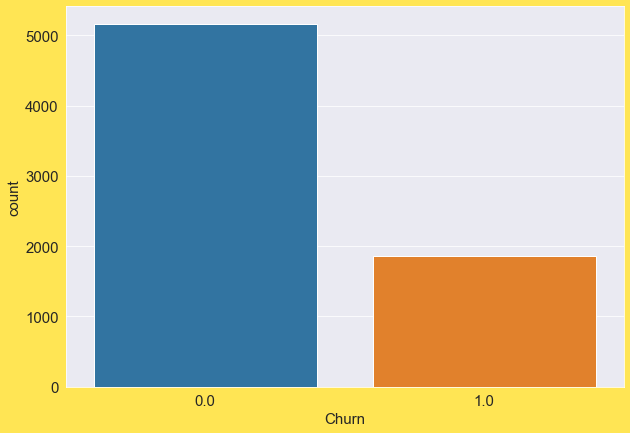

In [103]:
# plotting
sns.countplot(y)

# We can see that the data is imbalanced 
# Now we have to balance the data

In [104]:
# using smote oversampling from imblearn we will balance the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [105]:
# Checking the value counts again
y.value_counts()

0.0    5155
1.0    5155
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

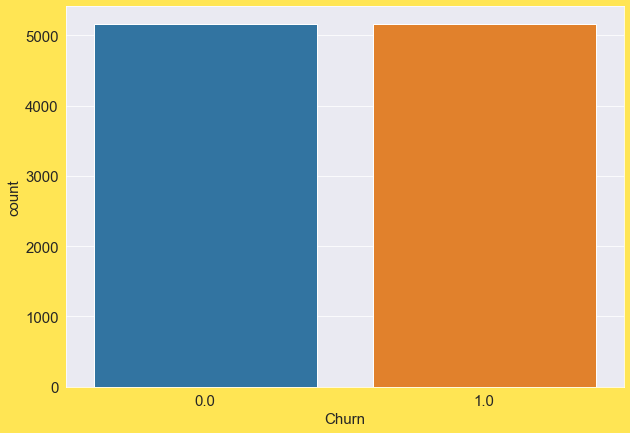

In [106]:
# plotting again
sns.countplot(y)

# We can see that the data is now balanced

# Model Building

In [107]:
# importing all the necessary models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [108]:
# Creating instances for models
lor = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
sgdc = SGDClassifier()
xgbc = XGBClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
etc = ExtraTreesClassifier()

## LogisticRegression

In [109]:
# finding the best random state for logistic regression
lor = LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lor.fit(x_train,y_train)
    pred_train = lor.predict(x_train)
    pred_test = lor.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1) == round(accuracy_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training accuracy score is ', round(accuracy_score(y_train,pred_train)*100,1))
        print('Testing accuracy score is ', round(accuracy_score(y_test,pred_test)*100,1), '\n\n')
        

At random state 5 The model performs very well
At random state:- 5
Training accuracy score is  77.2
Testing accuracy score is  77.2 


At random state 11 The model performs very well
At random state:- 11
Training accuracy score is  77.1
Testing accuracy score is  77.1 


At random state 24 The model performs very well
At random state:- 24
Training accuracy score is  77.0
Testing accuracy score is  77.0 


At random state 45 The model performs very well
At random state:- 45
Training accuracy score is  77.0
Testing accuracy score is  77.0 


At random state 75 The model performs very well
At random state:- 75
Training accuracy score is  77.1
Testing accuracy score is  77.1 


At random state 77 The model performs very well
At random state:- 77
Training accuracy score is  77.2
Testing accuracy score is  77.2 


At random state 102 The model performs very well
At random state:- 102
Training accuracy score is  77.3
Testing accuracy score is  77.3 


At random state 150 The model performs ve

In [114]:
# We have got 77% accuracy at random state 102
# At random state 349 the model performs well
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=102)

In [115]:
# Running the model with best random state
lor.fit(x_train,y_train)
pred_train_lor = lor.predict(x_train)
pred_test_lor = lor.predict(x_test)
print('Accuracy Score of lor: ',accuracy_score(y_test,pred_test_lor))
print('\n')
print(confusion_matrix(y_test,pred_test_lor))

# getting 77% accuracy with log reg

Accuracy Score of lor:  0.7730358874878759


[[1186  378]
 [ 324 1205]]


In [116]:
# lets check the cv score of lor
lss = accuracy_score(y_test,pred_test_lor) # creating an instance for acccuracy score
from sklearn.model_selection import cross_val_score

# running a for loop to find the best cv value which gives best score
for j in range(5,15):
    lsscore = cross_val_score(lor,x,y,cv=j)
    print(lsscore)
    lsc = lsscore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',lsc*100)
    print('accuracy_score is:- ',lss*100)
    print('\n')
    
# We can see that the cv score is almost same as the accuracy score
# So our model is running well

[0.75266731 0.75703201 0.77255092 0.785645   0.78273521]
At cv:-  5
Cross validation score is:-  77.01260911736178
accuracy_score is:-  77.30358874878759


[0.75159977 0.74810937 0.7782305  0.77648428 0.78463329 0.78288708]
At cv:-  6
Cross validation score is:-  77.0324048396079
accuracy_score is:-  77.30358874878759


[0.75831636 0.75016972 0.76035302 0.76714189 0.78411405 0.77936185
 0.78532609]
At cv:-  7
Cross validation score is:-  76.92547110936822
accuracy_score is:-  77.30358874878759


[0.75950349 0.74864236 0.74476338 0.78200155 0.78044996 0.7734678
 0.78493789 0.78959627]
At cv:-  8
Cross validation score is:-  77.04203388442097
accuracy_score is:-  77.30358874878759


[0.7521815  0.7582897  0.7443281  0.78621291 0.7600349  0.7860262
 0.78777293 0.77991266 0.78427948]
At cv:-  9
Cross validation score is:-  77.10042651993771
accuracy_score is:-  77.30358874878759


[0.76042677 0.74878758 0.75654704 0.76042677 0.76624636 0.77400582
 0.785645   0.78273521 0.78370514 0.7807953

In [117]:
# selecting cv = 9
lsscore_selected = cross_val_score(lor,x,y,cv=9).mean()
print('The cv score of logistcic Regression is ',lsscore_selected,'\nThe accuracy score of logistic regression is: ',lss)

# LOR = 77%

The cv score of logistcic Regression is  0.7710042651993771 
The accuracy score of logistic regression is:  0.7730358874878759


### Hyperparametertuning the models

## DecisionTreeClassifier

In [118]:
# creating a parameter grid to search best parameter using GridSearchCV
paramgrid_dtc = {'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'min_samples_split':[2,3,4,5,6,7,8],'min_samples_leaf':[0.5,1,1.5,2,2.5,3,3.5,4]}
print(paramgrid_dtc)

{'criterion': ['gini', 'entropy', 'log_loss'], 'splitter': ['best', 'random'], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8], 'min_samples_leaf': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]}


In [119]:
dtc_search = GridSearchCV(dtc,param_grid = paramgrid_dtc,error_score='raise')

In [120]:
# fitting the GRid to training data
dtc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise',
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [121]:
print(dtc_search.best_score_) # bestscore
print(dtc_search.best_estimator_)
print(dtc_search.best_params_) # best params 

0.7755304526772672
DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=4,
                       min_samples_split=7)
{'criterion': 'log_loss', 'min_samples_leaf': 4, 'min_samples_split': 7, 'splitter': 'best'}


In [124]:
# running the model using best parameters
dtc = DecisionTreeClassifier(criterion='log_loss',splitter='best',min_samples_leaf=4,min_samples_split=7) 
# using the best parameters
dtc.fit(x_train,y_train)
pred_dtc_test= dtc.predict(x_test)
pred_dtc_train = dtc.predict(x_train)
print('Training score of dtc',accuracy_score(pred_dtc_train,y_train))
print('Accuracy Score of dtc',accuracy_score(pred_dtc_test,y_test))
print('Confusion Matrix of dtc',confusion_matrix(pred_dtc_test,y_test))
print('Classification report of Dtc',classification_report(pred_dtc_test,y_test))
print('\n')

Training score of dtc 0.9193570735762783
Accuracy Score of dtc 0.7701260911736179
Confusion Matrix of dtc [[1243  390]
 [ 321 1139]]
Classification report of Dtc               precision    recall  f1-score   support

         0.0       0.79      0.76      0.78      1633
         1.0       0.74      0.78      0.76      1460

    accuracy                           0.77      3093
   macro avg       0.77      0.77      0.77      3093
weighted avg       0.77      0.77      0.77      3093





In [125]:
# Checking the cross validation of dtc
dtca = accuracy_score(pred_dtc_test,y_test)
for j in range(3,15):
    dtcscore = cross_val_score(dtc,x,y,cv=j)
    print(dtcscore)
    dsc = dtcscore.mean()
    print('At cv:- ',j)
    print('Cross validation score of DTC is:- ',dsc*100)
    print('accuracy_score of DTC is:- ',dtca*100)
    print('\n')

[0.69246436 0.78585976 0.80413271]
At cv:-  3
Cross validation score of DTC is:-  76.0818944109442
accuracy_score of DTC is:-  77.01260911736179


[0.693173   0.75950349 0.80830423 0.81140861]
At cv:-  4
Cross validation score of DTC is:-  76.80973344496114
accuracy_score of DTC is:-  77.01260911736179


[0.68380213 0.72405432 0.8186227  0.81474297 0.81619787]
At cv:-  5
Cross validation score of DTC is:-  77.14839961202715
accuracy_score of DTC is:-  77.01260911736179


[0.68411867 0.69808028 0.80093132 0.81140861 0.82479627 0.83410943]
At cv:-  6
Cross validation score of DTC is:-  77.5574097889709
accuracy_score of DTC is:-  77.01260911736179


[0.68635438 0.69721656 0.76306857 0.8173795  0.8173795  0.82484725
 0.82880435]
At cv:-  7
Cross validation score of DTC is:-  77.64357292549535
accuracy_score of DTC is:-  77.01260911736179


[0.70209465 0.71217998 0.70131885 0.81148177 0.83010085 0.82699767
 0.8439441  0.83074534]
At cv:-  8
Cross validation score of DTC is:-  78.2357902389

In [126]:
# the cv score at 4 and accuracy score is almost same, so we can say that the model is working well
# cv= 10 for DecisionTree
dtcscore_selected = cross_val_score(dtc,x,y,cv=4).mean()
print('The cv score of DecisionTree is ',dtcscore_selected,'\nThe accuracy score of DecisionTree is: ',dtca)

# DTC =  77%

The cv score of DecisionTree is  0.768000661096716 
The accuracy score of DecisionTree is:  0.7701260911736179


## SupportVectorClassifier¶

In [127]:
# Creating parameter grid for  SVC
paramgrid_svc = {'C':[0.1,0.2,0.3,0.4,1.0,1.5],
                 'kernel':['rbf','poly','sigmoid'],
                 'degree':[3,4,5,6],'gamma':['scale','auto'],'decision_function_shape':['ovo', 'ovr'],'cache_size':[150,200,250,300],'shrinking':[True,False]}
print(paramgrid_svc)

{'C': [0.1, 0.2, 0.3, 0.4, 1.0, 1.5], 'kernel': ['rbf', 'poly', 'sigmoid'], 'degree': [3, 4, 5, 6], 'gamma': ['scale', 'auto'], 'decision_function_shape': ['ovo', 'ovr'], 'cache_size': [150, 200, 250, 300], 'shrinking': [True, False]}


In [128]:
svc_search = GridSearchCV(svc,param_grid=paramgrid_svc,error_score='raise')

In [129]:
svc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 1.0, 1.5],
                         'cache_size': [150, 200, 250, 300],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'degree': [3, 4, 5, 6], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'shrinking': [True, False]})

In [131]:
print(svc_search.best_score_)
print(svc_search.best_estimator_)
print(svc_search.best_params_) # best params

0.8201469315042722
SVC(C=1.5, cache_size=150, decision_function_shape='ovo')
{'C': 1.5, 'cache_size': 150, 'decision_function_shape': 'ovo', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}


In [132]:
# running the model using the best params
svc = SVC(C=1.5,degree=3,gamma='scale',kernel='rbf',cache_size=150,decision_function_shape='ovo',shrinking=True) # using the best parameters
svc.fit(x_train,y_train)
pred_svc_test= svc.predict(x_test)
pred_svc_train = svc.predict(x_train)
print('Training score of svc',accuracy_score(pred_svc_train,y_train))
print('Accuracy Score of svc',accuracy_score(pred_svc_test,y_test))
print('Confusion Matrix of svc',confusion_matrix(pred_svc_test,y_test))
print('Classification report of svc',classification_report(pred_svc_test,y_test))
print('\n')

# We are getting around 72 % accuracy with SVC

Training score of svc 0.8757101288624082
Accuracy Score of svc 0.8263821532492726
Confusion Matrix of svc [[1253  226]
 [ 311 1303]]
Classification report of svc               precision    recall  f1-score   support

         0.0       0.80      0.85      0.82      1479
         1.0       0.85      0.81      0.83      1614

    accuracy                           0.83      3093
   macro avg       0.83      0.83      0.83      3093
weighted avg       0.83      0.83      0.83      3093





In [133]:
# checking the cv score
svca = accuracy_score(y_test,pred_svc_test) 
for j in range(4,10):
    svccore = cross_val_score(svc,x,y,cv=j)
    print(svccore)
    svcc = svccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',svcc*100)
    print('accuracy_score is:- ',svca*100)
    print('\n') # cv and accuracy is almost same

[0.76338247 0.81109387 0.86030268 0.86767559]
At cv:-  4
Cross validation score is:-  82.56136518880241
accuracy_score is:-  82.63821532492726


[0.75509214 0.76188167 0.86372454 0.8671193  0.87730359]
At cv:-  5
Cross validation score is:-  82.50242483026187
accuracy_score is:-  82.63821532492726


[0.76497964 0.7469459  0.85215367 0.86437718 0.87194412 0.88358556]
At cv:-  6
Cross validation score is:-  83.06643456016585
accuracy_score is:-  82.63821532492726


[0.77325187 0.75084861 0.80515954 0.8581127  0.87847929 0.87372709
 0.88722826]
At cv:-  7
Cross validation score is:-  83.24010501659266
accuracy_score is:-  82.63821532492726


[0.7742436  0.76105508 0.74476338 0.87432118 0.86889061 0.86811482
 0.88276398 0.88431677]
At cv:-  8
Cross validation score is:-  83.23086773414799
accuracy_score is:-  82.63821532492726


[0.76265271 0.76788831 0.73560209 0.85340314 0.85514834 0.88122271
 0.87161572 0.88122271 0.88908297]
At cv:-  9
Cross validation score is:-  83.30931882979255
acc

In [134]:
# selecting cv = 4
svcscore_selected = cross_val_score(svc,x,y,cv=4).mean()
print('The cv score of SVC is ',svcscore_selected,'\nThe accuracy score of SVC is: ',svca)


# 82% from SVC

The cv score of SVC is  0.8256136518880242 
The accuracy score of SVC is:  0.8263821532492726


## KNeighborsClassifier

In [135]:
# paragrid for KNC
paramgrid_knc = {'n_neighbors':[x for x in range(5,16)],'algorithm':['auto','ball_tree','kd_tree'],
                 'leaf_size':[l for l in range(30,41)],'p':[2,3,4,6],}
# writing a list comprehension for leaf_size and n_neighbors instead of writing all the values

In [136]:
knc_search = GridSearchCV(knc,param_grid=paramgrid_knc)

In [137]:
knc_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
                                       40],
                         'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'p': [2, 3, 4, 6]})

In [138]:
# getting the best params and score
print(knc_search.best_score_)
print(knc_search.best_estimator_)
print(knc_search.best_params_)

0.7616697669329249
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=6)
{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_neighbors': 6, 'p': 2}


In [140]:
# running the model using the best params
knc = KNeighborsClassifier(algorithm='auto',leaf_size=30,n_neighbors=6,p=2) # using the best parameters
knc.fit(x_train,y_train)
pred_knc_test= knc.predict(x_test)
pred_knc_train = knc.predict(x_train)
print('Training score of knc: ',accuracy_score(pred_knc_train,y_train))
print('Accuracy Score of knc: ',accuracy_score(pred_knc_test,y_test))
print('Confusion Matrix of knc: ',confusion_matrix(pred_knc_test,y_test))
print('Classification report of knc: ',classification_report(pred_knc_test,y_test))
print('\n')

# getting 74% accuracy

Training score of knc:  0.8448108632395732
Accuracy Score of knc:  0.7723892660847074
Confusion Matrix of knc:  [[1116  256]
 [ 448 1273]]
Classification report of knc:                precision    recall  f1-score   support

         0.0       0.71      0.81      0.76      1372
         1.0       0.83      0.74      0.78      1721

    accuracy                           0.77      3093
   macro avg       0.77      0.78      0.77      3093
weighted avg       0.78      0.77      0.77      3093





In [142]:
# checking the cv score
knca = accuracy_score(y_test,pred_knc_test) 
for j in range(3,10):
    knccore = cross_val_score(knc,x,y,cv=j)
    print(knccore)
    kncc = knccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',kncc*100)
    print('accuracy_score is:- ',knca*100)
    print('\n') # cv and accuracy is almost same

[0.75065464 0.78760547 0.78928987]
At cv:-  3
Cross validation score is:-  77.58499941685524
accuracy_score is:-  77.23892660847073


[0.75096974 0.75717611 0.80519984 0.80248351]
At cv:-  4
Cross validation score is:-  77.89573005578681
accuracy_score is:-  77.23892660847073


[0.74539282 0.75121242 0.80455868 0.81134821 0.81474297]
At cv:-  5
Cross validation score is:-  78.545101842871
accuracy_score is:-  77.23892660847073


[0.7417103  0.75334497 0.78987194 0.80908033 0.80908033 0.81606519]
At cv:-  6
Cross validation score is:-  78.65255088024166
accuracy_score is:-  77.23892660847073


[0.74745418 0.75356415 0.77393075 0.80787508 0.81670061 0.81602172
 0.81589674]
At cv:-  7
Cross validation score is:-  79.02061775520444
accuracy_score is:-  77.23892660847073


[0.74786656 0.74321179 0.75019395 0.80915438 0.81536074 0.80372382
 0.82686335 0.8113354 ]
At cv:-  8
Cross validation score is:-  78.84637508492789
accuracy_score is:-  77.23892660847073


[0.7425829  0.7460733  0.753054

In [143]:
# selecting cv = 4 and we are getting accuracy and cv score almost same , which means our model is working well
kncscore_selected = cross_val_score(knc,x,y,cv=4).mean()
print('The cv score of KNeighborsC is ',kncscore_selected,'\nThe accuracy score of KNeighborsC is: ',knca)

# 77% accuracy from KNeighborsC

The cv score of KNeighborsC is  0.7789573005578682 
The accuracy score of KNeighborsC is:  0.7723892660847074


## SGDClassifier

In [144]:
# paramgrid
parametergrid_sgdc = {'loss':['hinge','log_loss','log','modified_huber','squared_hinge'],
                     'penalty':['l2','l1','elasticnet'],'alpha':[0.1,.001,0.0001,1,10],'max_iter':[1000,1200,1300,1400,1500],
                     'l1_ratio':[0.15,0.30,0.45,0.60,0.75],'learning_rate':['constant','optimal','invscaling','adaptive']}

In [145]:
sgdc_search = GridSearchCV(sgdc,param_grid=parametergrid_sgdc)

In [146]:
# fitting the cv to train data
sgdc_search.fit(x_train,y_train)

GridSearchCV(estimator=SGDClassifier(),
             param_grid={'alpha': [0.1, 0.001, 0.0001, 1, 10],
                         'l1_ratio': [0.15, 0.3, 0.45, 0.6, 0.75],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'loss': ['hinge', 'log_loss', 'log', 'modified_huber',
                                  'squared_hinge'],
                         'max_iter': [1000, 1200, 1300, 1400, 1500],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [147]:
# getting best prams 
print(sgdc_search.best_score_)
print(sgdc_search.best_estimator_)
print(sgdc_search.best_params_)

0.7742807478264542
SGDClassifier(alpha=0.001, l1_ratio=0.75, loss='log', max_iter=1300,
              penalty='elasticnet')
{'alpha': 0.001, 'l1_ratio': 0.75, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1300, 'penalty': 'elasticnet'}


In [152]:
# running the model using the best params
sgdc = SGDClassifier(alpha=0.001,loss='log',max_iter=1300,penalty='elasticnet',l1_ratio=0.75,learning_rate='optimal') # using the best parameters
sgdc.fit(x_train,y_train)
pred_sgdc_test= sgdc.predict(x_test)
pred_sgdc_train = sgdc.predict(x_train)
print('Training score of SGDClassifier: ',accuracy_score(pred_sgdc_train,y_train))
print('Accuracy Score of SGDClassifier: ',accuracy_score(pred_sgdc_test,y_test))
print('Confusion Matrix of SGDClassifier: ',confusion_matrix(pred_sgdc_test,y_test))
print('Classification report of SGDClassifier: ',classification_report(pred_sgdc_test,y_test))
print('\n')

# sgdc is giving 76%

Training score of SGDClassifier:  0.7708188998198697
Accuracy Score of SGDClassifier:  0.7691561590688651
Confusion Matrix of SGDClassifier:  [[1228  378]
 [ 336 1151]]
Classification report of SGDClassifier:                precision    recall  f1-score   support

         0.0       0.79      0.76      0.77      1606
         1.0       0.75      0.77      0.76      1487

    accuracy                           0.77      3093
   macro avg       0.77      0.77      0.77      3093
weighted avg       0.77      0.77      0.77      3093





In [153]:
# checking the cv score
sgdca = accuracy_score(y_test,pred_sgdc_test) 
for j in range(4,10):
    sgdccore = cross_val_score(sgdc,x,y,cv=j)
    print(sgdccore)
    sgdcc = sgdccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',sgdcc*100)
    print('accuracy_score is:- ',sgdca*100)
    print('\n') # cv and accuracy is almost same

[0.75368503 0.76221877 0.77881257 0.78191696]
At cv:-  4
Cross validation score is:-  76.91583329645522
accuracy_score is:-  76.91561590688652


[0.75315228 0.75897187 0.77449079 0.78322017 0.77691562]
At cv:-  5
Cross validation score is:-  76.93501454898157
accuracy_score is:-  76.91561590688652


[0.7504363  0.74636417 0.77648428 0.77648428 0.78405122 0.77182771]
At cv:-  6
Cross validation score is:-  76.76079937460821
accuracy_score is:-  76.91561590688652


[0.75763747 0.75492193 0.76442634 0.77189409 0.78954515 0.78343517
 0.78328804]
At cv:-  7
Cross validation score is:-  77.21640275476169
accuracy_score is:-  76.91561590688652


[0.76493406 0.75096974 0.74941815 0.78510473 0.78510473 0.7742436
 0.77872671 0.79114907]
At cv:-  8
Cross validation score is:-  77.24563494740494
accuracy_score is:-  76.91561590688652


[0.7434555  0.7582897  0.7382199  0.77835951 0.76352531 0.78253275
 0.78253275 0.77729258 0.77641921]
At cv:-  9
Cross validation score is:-  76.67363561462649
accu

In [154]:
# selecting cv = 6
sgdcscore_selected = cross_val_score(sgdc,x,y,cv=6).mean()
print('The cv score of SGDClassifier is ',sgdcscore_selected,'\nThe accuracy score of SGDClassifier is: ',sgdca)

# % with sgdc and cv score is almost same so our model is working well
# getting 71% accuracy after cv

The cv score of SGDClassifier is  0.7700332380482195 
The accuracy score of SGDClassifier is:  0.7691561590688651


## XGBClassifier

In [155]:
xgbc = XGBClassifier() 
xgbc.fit(x_train,y_train)
pred_xgbc_test= xgbc.predict(x_test)
pred_xgbc_train = xgbc.predict(x_train)
print('Training score of SGDClassifier: ',accuracy_score(pred_xgbc_train,y_train))
print('Accuracy Score of SGDClassifier: ',accuracy_score(pred_xgbc_test,y_test))
print('Confusion Matrix of SGDClassifier: ',confusion_matrix(pred_xgbc_test,y_test))
print('Classification report of SGDClassifier: ',classification_report(pred_xgbc_test,y_test))
print('\n')

Training score of SGDClassifier:  0.9531661355133713
Accuracy Score of SGDClassifier:  0.8516003879728419
Confusion Matrix of SGDClassifier:  [[1356  251]
 [ 208 1278]]
Classification report of SGDClassifier:                precision    recall  f1-score   support

           0       0.87      0.84      0.86      1607
           1       0.84      0.86      0.85      1486

    accuracy                           0.85      3093
   macro avg       0.85      0.85      0.85      3093
weighted avg       0.85      0.85      0.85      3093





In [156]:
# checking the cv score
xgbca = accuracy_score(y_test,pred_xgbc_test) 
for j in range(4,10):
    xgbccore = cross_val_score(xgbc,x,y,cv=j)
    print(xgbccore)
    xgbcc = xgbccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',xgbcc*100)
    print('accuracy_score is:- ',xgbca*100)
    print('\n') # cv and accuracy is almost same

[0.67339022 0.82816137 0.90221187 0.91812185]
At cv:-  4
Cross validation score is:-  83.04713279403977
accuracy_score is:-  85.16003879728419


[0.67895247 0.74054316 0.90494665 0.91561591 0.9199806 ]
At cv:-  5
Cross validation score is:-  83.2007759456838
accuracy_score is:-  85.16003879728419


[0.68179174 0.68470041 0.89289872 0.90861467 0.91036088 0.92956927]
At cv:-  6
Cross validation score is:-  83.46559475992824
accuracy_score is:-  85.16003879728419


[0.6904277  0.70400543 0.82281059 0.90970808 0.92600136 0.92057026
 0.93070652]
At cv:-  7
Cross validation score is:-  84.34614204753895
accuracy_score is:-  85.16003879728419


[0.70209465 0.70752521 0.72304112 0.9193173  0.89837083 0.9193173
 0.93167702 0.92546584]
At cv:-  8
Cross validation score is:-  84.08511581513909
accuracy_score is:-  85.16003879728419


[0.69371728 0.71204188 0.69633508 0.87783595 0.89528796 0.92925764
 0.92052402 0.92052402 0.93624454]
At cv:-  9
Cross validation score is:-  84.24187076030968
accur

In [157]:
# selecting cv = 7
xgbcscore_selected = cross_val_score(xgbc,x,y,cv=7).mean()
print('The cv score of XGBClassifier is ',xgbcscore_selected,'\nThe accuracy score of XGBClassifier is: ',xgbca)

# % with sgdc and cv score is almost same so our model is working well
# getting 85% accuracy after cv

The cv score of XGBClassifier is  0.8434614204753894 
The accuracy score of XGBClassifier is:  0.8516003879728419


#### Ensemble Methods

## RandomForestClassifier

In [158]:
# framing the parameters
# no of trees in random forest
n_estimators = [int(x) for x in range(100,300,50)]

# method of measuring the quality of split 
criterion = ['gini','entropy','log_loss']

# features to consider for best split
max_features = ["sqrt", "log2", None]

# max depth of the tree
max_depth = [2,4,6]

min_samples_split = [2,5,7,3,4]

min_samples_leaf = [2,3,4,5]

class_weight = ["balanced", "balanced_subsample"]

bootstrap = [True,False]

In [159]:
# creating the paramgrid
param_grid = {'n_estimators':n_estimators,
             'criterion':criterion,
             'max_features':max_features,
             'max_depth':max_depth,
             'class_weight':class_weight,
             'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [100, 150, 200, 250], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_features': ['sqrt', 'log2', None], 'max_depth': [2, 4, 6], 'class_weight': ['balanced', 'balanced_subsample'], 'bootstrap': [True, False]}


In [160]:
rfc_search = GridSearchCV(rfc,param_grid=param_grid,error_score='raise')

In [161]:
rfc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise',
             estimator=RandomForestClassifier(max_depth=6, max_features='log2',
                                              min_samples_leaf=3,
                                              min_samples_split=7,
                                              n_estimators=150),
             param_grid={'bootstrap': [True, False],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 150, 200, 250]})

In [162]:
print(rfc_search.best_score_)
print(rfc_search.best_estimator_)
print(rfc_search.best_params_) # we got the best score and best params

0.8089221439636951
RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='entropy', max_depth=6, max_features='log2',
                       min_samples_leaf=3, min_samples_split=7,
                       n_estimators=150)
{'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 150}


In [164]:
# running the model using the best params
rfc = RandomForestClassifier(criterion='entropy',max_depth=6, max_features='log2',min_samples_leaf=3,min_samples_split=7,n_estimators=150,bootstrap=False,class_weight='balanced') # using the best parameters
rfc.fit(x_train,y_train)
pred_rfc_test= rfc.predict(x_test)
pred_rfc_train = rfc.predict(x_train)
print('Training score of RandomForestClassifier: ',accuracy_score(pred_rfc_train,y_train))
print('Accuracy Score of RandomForestClassifier: ',accuracy_score(pred_rfc_test,y_test))
print('Confusion Matrix of RandomForestClassifier: ',confusion_matrix(pred_rfc_test,y_test))
print('Classification report of RandomForestClassifier: ',classification_report(pred_rfc_test,y_test))
print('\n')

# getting 80% accuracy

Training score of RandomForestClassifier:  0.8244422890397672
Accuracy Score of RandomForestClassifier:  0.8053669576462981
Confusion Matrix of RandomForestClassifier:  [[1213  251]
 [ 351 1278]]
Classification report of RandomForestClassifier:                precision    recall  f1-score   support

         0.0       0.78      0.83      0.80      1464
         1.0       0.84      0.78      0.81      1629

    accuracy                           0.81      3093
   macro avg       0.81      0.81      0.81      3093
weighted avg       0.81      0.81      0.81      3093





In [165]:
# checking the cv score
rfca = accuracy_score(y_test,pred_rfc_test) 
for j in range(4,10):
    rfccore = cross_val_score(rfc,x,y,cv=j)
    print(rfccore)
    rfcc = rfccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',rfcc*100)
    print('accuracy_score is:- ',rfca*100)
    print('\n') # cv and accuracy is almost same

[0.75989139 0.79247479 0.82964688 0.83352736]
At cv:-  4
Cross validation score is:-  80.388510223367
accuracy_score is:-  80.53669576462981


[0.75800194 0.75897187 0.83074685 0.84529583 0.83705141]
At cv:-  5
Cross validation score is:-  80.60135790494665
accuracy_score is:-  80.53669576462981


[0.75450844 0.73705643 0.82828871 0.83410943 0.83934808 0.84284051]
At cv:-  6
Cross validation score is:-  80.60252653411628
accuracy_score is:-  80.53669576462981


[0.76510523 0.74202308 0.78886626 0.83435166 0.84589274 0.83570944
 0.83763587]
At cv:-  7
Cross validation score is:-  80.70834677402352
accuracy_score is:-  80.53669576462981


[0.76415826 0.73622964 0.74631497 0.83785881 0.84096199 0.83553142
 0.83695652 0.8439441 ]
At cv:-  8
Cross validation score is:-  80.52444628220634
accuracy_score is:-  80.53669576462981


[0.76265271 0.7530541  0.73472949 0.83158813 0.82460733 0.84716157
 0.8419214  0.8349345  0.83668122]
At cv:-  9
Cross validation score is:-  80.74811614010041
accur

In [166]:
# selecting cv = 8
# we are getting the cv score and accuracy almost same so our model is working well
rfcscore_selected = cross_val_score(rfc,x,y,cv=8).mean()
print('The cv score of RandomForestClassifier is ',rfcscore_selected,'\nThe accuracy score of RandomForestClassifier is: ',rfca)
# getting 80% with rfc

The cv score of RandomForestClassifier is  0.8063107294643159 
The accuracy score of RandomForestClassifier is:  0.8053669576462981


## AdaBoostClassifier

In [167]:
parametergrid_abc = {'n_estimators':[x for x in range(50,61)],'algorithm':['SAMME','SAMME.R'],'learning_rate':[0.5,1.0,1.5]}

In [168]:
abc_search = GridSearchCV(abc,param_grid=parametergrid_abc,error_score='raise')

In [169]:
abc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.5, 1.0, 1.5],
                         'n_estimators': [50, 51, 52, 53, 54, 55, 56, 57, 58,
                                          59, 60]})

In [170]:
print(abc_search.best_score_)
print(abc_search.best_estimator_)
print(abc_search.best_params_) # we got the best score and best params

0.8218100371839985
AdaBoostClassifier(learning_rate=1.5, n_estimators=60)
{'algorithm': 'SAMME.R', 'learning_rate': 1.5, 'n_estimators': 60}


In [171]:
# running the model using the best params
abc = AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.5,n_estimators=60) # using the best parameters
abc.fit(x_train,y_train)
pred_abc_test= abc.predict(x_test)
pred_abc_train = abc.predict(x_train)
print('Training score of AdaBoostClassifier: ',accuracy_score(pred_abc_train,y_train))
print('Accuracy Score of AdaBoostClassifier: ',accuracy_score(pred_abc_test,y_test))
print('Confusion Matrix of AdaBoostClassifier: ',confusion_matrix(pred_abc_test,y_test))
print('Classification report of AdaBoostClassifier: ',classification_report(pred_abc_test,y_test))
print('\n')

# we are getting 82% accuracy with AdaBoostClassifier

Training score of AdaBoostClassifier:  0.8280448940002771
Accuracy Score of AdaBoostClassifier:  0.829938570966699
Confusion Matrix of AdaBoostClassifier:  [[1290  252]
 [ 274 1277]]
Classification report of AdaBoostClassifier:                precision    recall  f1-score   support

         0.0       0.82      0.84      0.83      1542
         1.0       0.84      0.82      0.83      1551

    accuracy                           0.83      3093
   macro avg       0.83      0.83      0.83      3093
weighted avg       0.83      0.83      0.83      3093





In [173]:
# checking the cv score
abca = accuracy_score(y_test,pred_abc_test) 
for j in range(6,15):
    abccore = cross_val_score(abc,x,y,cv=j)
    print(abccore)
    abcc = abccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',abcc*100)
    print('accuracy_score is:- ',abca*100)
    print('\n') # cv and accuracy is almost same

[0.7434555  0.71669575 0.84982538 0.87252619 0.84982538 0.86670547]
At cv:-  6
Cross validation score is:-  81.65056120245704
accuracy_score is:-  82.9938570966699


[0.74473863 0.72640869 0.78954515 0.84114053 0.87372709 0.86014936
 0.86413043]
At cv:-  7
Cross validation score is:-  81.42628387581013
accuracy_score is:-  82.9938570966699


[0.75329713 0.7261443  0.74553918 0.86423584 0.86578743 0.8541505
 0.87189441 0.86645963]
At cv:-  8
Cross validation score is:-  81.84385525637381
accuracy_score is:-  82.9938570966699


[0.7504363  0.7417103  0.73036649 0.84031414 0.84118674 0.88122271
 0.84978166 0.87860262 0.86637555]
At cv:-  9
Cross validation score is:-  81.99996104840751
accuracy_score is:-  82.9938570966699


[0.74781765 0.73617847 0.72453928 0.78079534 0.85354025 0.85935984
 0.87584869 0.85838991 0.85741998 0.87293889]
At cv:-  10
Cross validation score is:-  81.66828322017459
accuracy_score is:-  82.9938570966699


[0.76012793 0.72814499 0.74840085 0.71824973 0.86125934 

In [174]:
# selecting cv = 13
# we are getting cv score and accuracy almost same, so our model is working well 82%%
abcscore_selected = cross_val_score(abc,x,y,cv=13).mean()
print('The cv score of AdaBoostClassifier is ',abcscore_selected,'\nThe accuracy score of AdaBoostClassifier is: ',abca)

The cv score of AdaBoostClassifier is  0.8225091523314959 
The accuracy score of AdaBoostClassifier is:  0.829938570966699


## GradientBoostingClassifier

In [175]:
parametergrid_gbc = {'loss':['log_loss','deviance','exponential'],'n_estimators':[int(x) for x in range(100,300,50)],
                    'criterion':['friedman_mse','squared_error','mse'],'subsample':[0.1,0.2,0.3,0.4],
                    'min_samples_split':[2,3,4,5,6],'min_samples_leaf':[1,2,3,4,5]} 

In [176]:
# creating a gridsearch cv
gbc_search = GridSearchCV(gbc,param_grid=parametergrid_gbc,error_score='raise')

In [177]:
gbc_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250],
                         'subsample': [0.1, 0.2, 0.3, 0.4]})

In [178]:
print(gbc_search.best_score_)
print(gbc_search.best_estimator_)
print(gbc_search.best_params_) # we got the best score and best params

0.8491052420415303
GradientBoostingClassifier(criterion='mse', loss='deviance', min_samples_leaf=5,
                           min_samples_split=6, n_estimators=200,
                           subsample=0.4)
{'criterion': 'mse', 'loss': 'deviance', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 200, 'subsample': 0.4}


In [185]:
# running the model using the best params
gbc = GradientBoostingClassifier(loss='deviance',n_estimators=250,criterion='mse',subsample=0.4,min_samples_split=5,min_samples_leaf=5) # using the best parameters
gbc.fit(x_train,y_train)
pred_gbc_test= gbc.predict(x_test)
pred_gbc_train = gbc.predict(x_train)
print('Training score of GradientBoostingClassifier: ',accuracy_score(pred_gbc_train,y_train))
print('Accuracy Score of GradientBoostingClassifier: ',accuracy_score(pred_gbc_test,y_test))
print('Confusion Matrix of GradientBoostingClassifier: ',confusion_matrix(pred_gbc_test,y_test))
print('Classification report of GradientBoostingClassifier: ',classification_report(pred_gbc_test,y_test))
print('\n')

# getting 82% accuracy

Training score of GradientBoostingClassifier:  0.8772343078841623
Accuracy Score of GradientBoostingClassifier:  0.8522470093760104
Confusion Matrix of GradientBoostingClassifier:  [[1334  227]
 [ 230 1302]]
Classification report of GradientBoostingClassifier:                precision    recall  f1-score   support

         0.0       0.85      0.85      0.85      1561
         1.0       0.85      0.85      0.85      1532

    accuracy                           0.85      3093
   macro avg       0.85      0.85      0.85      3093
weighted avg       0.85      0.85      0.85      3093





In [186]:
# checking the cv score
gbca = accuracy_score(y_test,pred_gbc_test) 
for j in range(5,10):
    gbccore = cross_val_score(gbc,x,y,cv=j)
    print(gbccore)
    gbcc = gbccore.mean()
    print('At cv:- ',j)
    print('Cross validation score is:- ',gbcc*100)
    print('accuracy_score is:- ',gbca*100)
    print('\n') # cv and accuracy is almost same

[0.70611057 0.74442289 0.89961203 0.91222114 0.91028128]
At cv:-  5
Cross validation score is:-  83.45295829291949
accuracy_score is:-  85.22470093760104


[0.71204188 0.70157068 0.887078   0.89988359 0.90745052 0.92142026]
At cv:-  6
Cross validation score is:-  83.82408214430109
accuracy_score is:-  85.22470093760104


[0.72029871 0.71283096 0.80583842 0.90020367 0.91785472 0.91174474
 0.91644022]
At cv:-  7
Cross validation score is:-  84.07444903711949
accuracy_score is:-  85.22470093760104


[0.72226532 0.7253685  0.71761055 0.91621412 0.90147401 0.90923196
 0.92546584 0.91770186]
At cv:-  8
Cross validation score is:-  84.19165213054562
accuracy_score is:-  85.22470093760104


[0.71989529 0.73560209 0.69458988 0.87609075 0.90226876 0.91266376
 0.91266376 0.91703057 0.91965066]
At cv:-  9
Cross validation score is:-  84.33839450003514
accuracy_score is:-  85.22470093760104




In [187]:
# selecting cv = 9
gbcscore_selected = cross_val_score(gbc,x,y,cv=9).mean()
print('The cv score of GradientBoostingClassifier is ',abcscore_selected,'\nThe accuracy score of GradientBoostingClassifier is: ',gbca)
# # we are getting 85% accuracy

The cv score of GradientBoostingClassifier is  0.8225091523314959 
The accuracy score of GradientBoostingClassifier is:  0.8522470093760104


## Model Selection

In [189]:
models = pd.DataFrame({'Model Name':['Logistic Regression','DecisionTreeClassifier','RandomForestClassifier','AdaBoostClassifier','KNeighborsClassifier','SGDClassifier','SupportVectorClassifier','GradientBoostingClassifier','XGBoostClassifier'],
                       'Accuracy':[lss,dtca,rfca,abca,knca,sgdca,svca,gbca,xgbca],
                       'CV_Score':[lsscore_selected,dtcscore_selected,rfcscore_selected,abcscore_selected,kncscore_selected,sgdcscore_selected,svcscore_selected,gbcscore_selected,xgbcscore_selected]})
models


# We can see that that GradientBoosting classifier is giving slightly more accuracy than XGBoostclassifier
# So we will choose GradientBoostingClassifier

Model Name  Accuracy  CV_Score
0         Logistic Regression  0.773036  0.771004
1      DecisionTreeClassifier  0.770126  0.768001
2      RandomForestClassifier  0.805367  0.806311
3          AdaBoostClassifier  0.829939  0.822509
4        KNeighborsClassifier  0.772389  0.778957
5               SGDClassifier  0.769156  0.770033
6     SupportVectorClassifier  0.826382  0.825614
7  GradientBoostingClassifier  0.852247  0.843093
8           XGBoostClassifier  0.851600  0.843461

## Plotting a AUC-ROC Curve

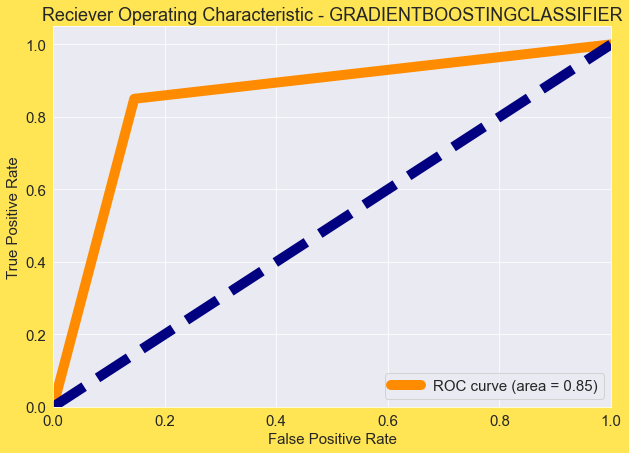

In [191]:
# plotting a auc roc with respect to XGBClassifier
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(pred_gbc_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color = 'darkorange',lw=10,label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color = 'navy',lw = 10, linestyle = '--')
plt.xlim([0.0,1.0]) # limitation
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic - GRADIENTBOOSTINGCLASSIFIER')
plt.legend(loc='lower right') 
plt.show()

# we can say that our model is working 90% 

## Saving the Model

In [192]:
import pickle
filename = 'income_pred.pkl'
pickle.dump(gbc,open(filename, 'wb'))

In [193]:
import numpy as np
a = np.array(y_test)
predicted = np.array(gbc.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index = range(len(a)))
df_com.sample(20)
# comparison of predicted and original value

Original  Predicted
427        1.0        1.0
2083       1.0        1.0
1808       1.0        1.0
480        0.0        0.0
1941       0.0        1.0
3008       1.0        1.0
2393       0.0        0.0
1761       1.0        1.0
2850       0.0        0.0
272        0.0        0.0
2586       1.0        1.0
3000       1.0        1.0
3088       1.0        0.0
969        1.0        1.0
2156       0.0        0.0
3013       0.0        0.0
1967       1.0        1.0
90         1.0        0.0
2378       0.0        0.0
2782       1.0        1.0